In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = ':https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F51153%2F95503%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240401%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240401T134516Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5c95229a188bf3b3b57ddcd8261ead5a809646f8ec7b9c1dd3c484b2685f9e7686a5ba750e90906652f391dc469e54c3218bef06ad5e10b85854d46b400adab631ebfcb6070a508f22825dae4921a14c6d8501b4ba015b121177b169d968aa90218ecf526c43b904b468f0cca250640fcc0961d0be0090d7127b61bf6720bd7ae0fc01ed4e0e1048f42ae9c98c8769d7e2584c959167a315fc36a549669e7e36879e2e0458f3a4557a79e440b6f0fd8fb83b22a4ed966554a844c3d01b4fb5f09fdca766ab8633969b5aa4d3640a7ac1846f8d2a3297a0658154ae03b4da388a291e49eddced1488786e66bd6b97bea512d76408de1eaab1a34661cb16f1b566'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 189065 bytes downloaded
Downloaded and uncompressed: 
Data source import complete.


In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
sns.set(style="ticks")
plt.rc('figure', figsize=(6, 3.7), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff",
       linewidth=0.4, grid=True, labelsize=10)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#EEEEEE', linewidth=0.25)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [3]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("../input/AmesHousing.csv")

In [4]:
# Configuring float numbers format
pd.options.display.float_format = '{:20.2f}'.format
dataset.head(n=5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.00,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [8]:
dataset.describe(include=[np.number], percentiles=[.5]) \
    .transpose().drop("count", axis=1)

,mean,std,min,50%,max
Order,1465.50,845.96,1.00,1465.50,2930.00
PID,714464496.99,188730844.65,526301100.00,535453620.00,1007100110.00
MS SubClass,57.39,42.64,20.00,50.00,190.00
Lot Frontage,69.22,23.37,21.00,68.00,313.00
Lot Area,10147.92,7880.02,1300.00,9436.50,215245.00
Overall Qual,6.09,1.41,1.00,6.00,10.00
Overall Cond,5.56,1.11,1.00,5.00,9.00
Year Built,1971.36,30.25,1872.00,1973.00,2010.00
Year Remod/Add,1984.27,20.86,1950.00,1993.00,2010.00
Mas Vnr Area,101.90,179.11,0.00,0.00,1600.00


In [10]:
# Getting the number of missing values in each column
num_missing = dataset.isna().sum()
# Excluding columns that contains 0 missing values
num_missing = num_missing[num_missing > 0]
# Getting the percentages of missing values
percent_missing = num_missing * 100 / dataset.shape[0]
# Concatenating the number and perecentage of missing values
# into one dataframe and sorting it
pd.concat([num_missing, percent_missing], axis=1,
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage
Pool QC,2917,99.56
Misc Feature,2824,96.38
Alley,2732,93.24
Fence,2358,80.48
Fireplace Qu,1422,48.53
Lot Frontage,490,16.72
Garage Cond,159,5.43
Garage Qual,159,5.43
Garage Finish,159,5.43
Garage Yr Blt,159,5.43


In [11]:
dataset["Pool Area"].value_counts()

0      2917
144       1
480       1
576       1
555       1
368       1
444       1
228       1
561       1
519       1
648       1
800       1
512       1
738       1
Name: Pool Area, dtype: int64

In [12]:
dataset["Pool QC"].fillna("No Pool", inplace=True)

In [13]:
dataset["Misc Val"].value_counts()

0        2827
400        18
500        13
450         9
600         8
700         7
2000        7
1500        3
1200        3
650         3
480         2
3000        2
2500        2
4500        2
455         1
1512        1
17000       1
1000        1
15500       1
460         1
8300        1
1300        1
560         1
620         1
900         1
1150        1
6500        1
1400        1
750         1
800         1
12500       1
350         1
490         1
80          1
54          1
3500        1
300         1
420         1
Name: Misc Val, dtype: int64

In [14]:
dataset['Misc Feature'].fillna('No feature', inplace=True)

In [15]:
dataset['Alley'].fillna('No Alley', inplace=True)
dataset['Fence'].fillna('No Fence', inplace=True)
dataset['Fireplace Qu'].fillna('No Fireplace', inplace=True)

In [16]:
dataset['Lot Frontage'].fillna(0, inplace=True)

In [17]:
garage_columns = [col for col in dataset.columns if col.startswith("Garage")]
dataset[dataset['Garage Cars'].isna()][garage_columns]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
2236,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
dataset[~pd.isna(dataset['Garage Type']) &
        pd.isna(dataset['Garage Qual'])][garage_columns]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1356,Detchd,NaN,NaN,1.00,360.00,NaN,NaN
2236,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
dataset['Garage Cars'].fillna(0, inplace=True)
dataset['Garage Area'].fillna(0, inplace=True)

dataset.loc[~pd.isna(dataset['Garage Type']) &
            pd.isna(dataset['Garage Qual']), "Garage Type"] = "No Garage"

for col in ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']:
    dataset[col].fillna('No Garage', inplace=True)

dataset['Garage Yr Blt'].fillna(0, inplace=True)

In [20]:
bsmt_columns = [col for col in dataset.columns if "Bsmt" in col]
dataset[dataset['Bsmt Half Bath'].isna()][bsmt_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,NaN,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,NaN,NaN


In [21]:
dataset[~pd.isna(dataset['Bsmt Cond']) &
        pd.isna(dataset['Bsmt Exposure'])][bsmt_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
66,Gd,TA,NaN,Unf,0.00,Unf,0.00,1595.00,1595.00,0.00,0.00
1796,Gd,TA,NaN,Unf,0.00,Unf,0.00,725.00,725.00,0.00,0.00
2779,Gd,TA,NaN,Unf,0.00,Unf,0.00,936.00,936.00,0.00,0.00


In [22]:
dataset[~pd.isna(dataset['Bsmt Cond']) &
        pd.isna(dataset['BsmtFin Type 2'])][bsmt_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
444,Gd,TA,No,GLQ,1124.00,NaN,479.00,1603.00,3206.00,1.00,0.00


In [23]:
for col in ["Bsmt Half Bath", "Bsmt Full Bath", "Total Bsmt SF",
            "Bsmt Unf SF", "BsmtFin SF 2", "BsmtFin SF 1"]:
    dataset[col].fillna(0, inplace=True)

dataset.loc[~pd.isna(dataset['Bsmt Cond']) &
            pd.isna(dataset['Bsmt Exposure']), "Bsmt Exposure"] = "No"
dataset.loc[~pd.isna(dataset['Bsmt Cond']) &
            pd.isna(dataset['BsmtFin Type 2']), "BsmtFin Type 2"] = "Unf"

for col in ["Bsmt Exposure", "BsmtFin Type 2",
            "BsmtFin Type 1", "Bsmt Qual", "Bsmt Cond"]:
    dataset[col].fillna("No Basement", inplace=True)

In [24]:
dataset['Mas Vnr Area'].fillna(0, inplace=True)
dataset['Mas Vnr Type'].fillna("None", inplace=True)

In [25]:
dataset['Electrical'].fillna(dataset['Electrical'].mode()[0], inplace=True)

In [26]:
dataset.isna().values.sum()

0

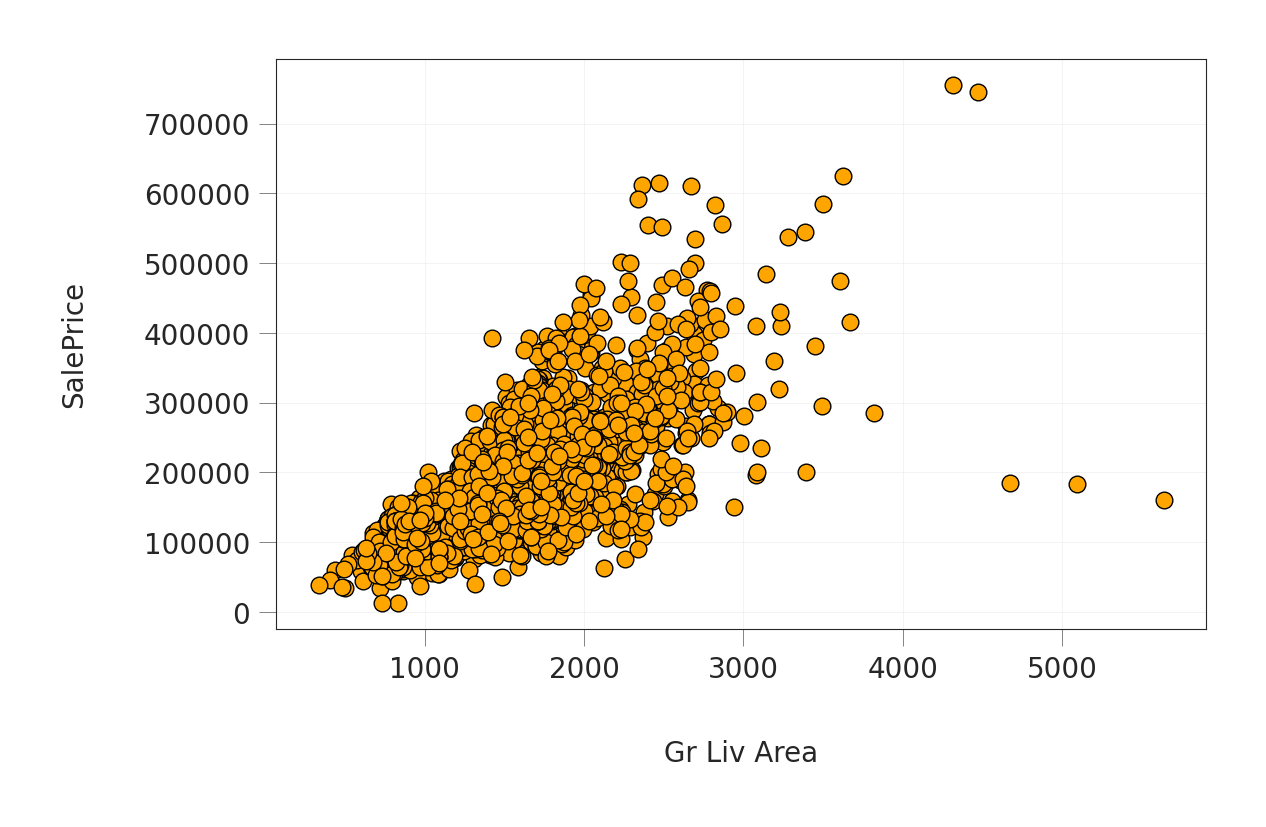

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.scatter(x=dataset['Gr Liv Area'], y=dataset['SalePrice'],
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice");

In [28]:
outlirt_columns = ["Gr Liv Area"] + \
                  [col for col in dataset.columns if "Sale" in col]
dataset[dataset["Gr Liv Area"] > 4000][outlirt_columns]

,Gr Liv Area,Sale Type,Sale Condition,SalePrice
1498,5642,New,Partial,160000
1760,4476,WD,Abnorml,745000
1767,4316,WD,Normal,755000
2180,5095,New,Partial,183850
2181,4676,New,Partial,184750


In [29]:
dataset = dataset[dataset["Gr Liv Area"] < 4000]

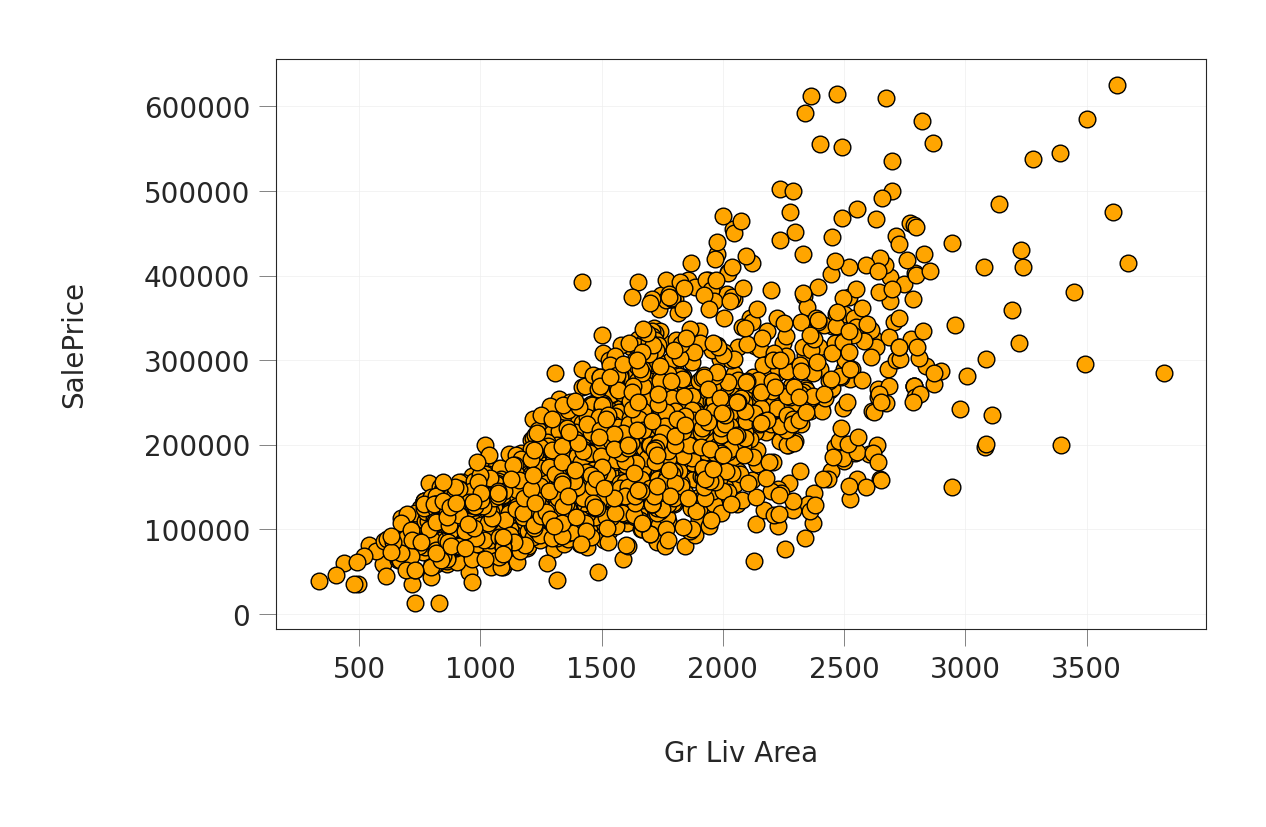

In [30]:
plt.scatter(x=dataset['Gr Liv Area'], y=dataset['SalePrice'],
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice");

In [31]:
dataset.reset_index(drop=True, inplace=True)

In [32]:
dataset.drop(['Order', 'PID'], axis=1, inplace=True)

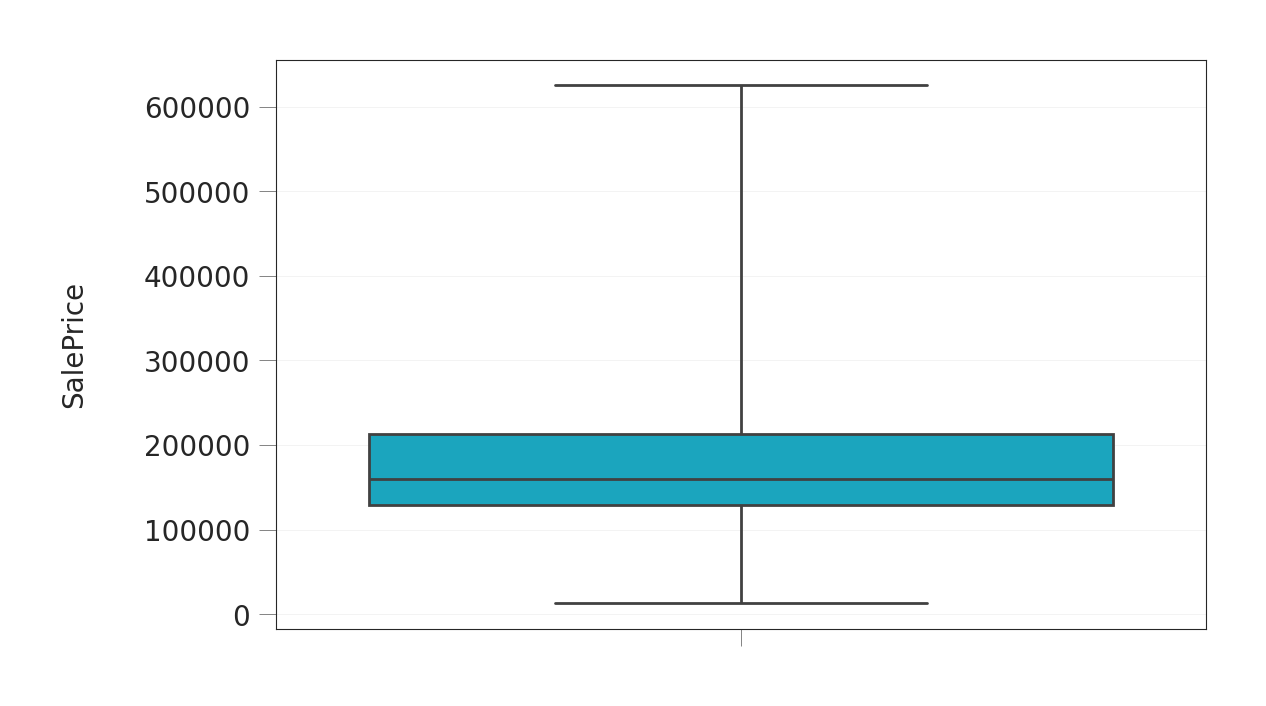

In [34]:
sns.boxplot(dataset['SalePrice'], whis=10, color="#00B8D9");

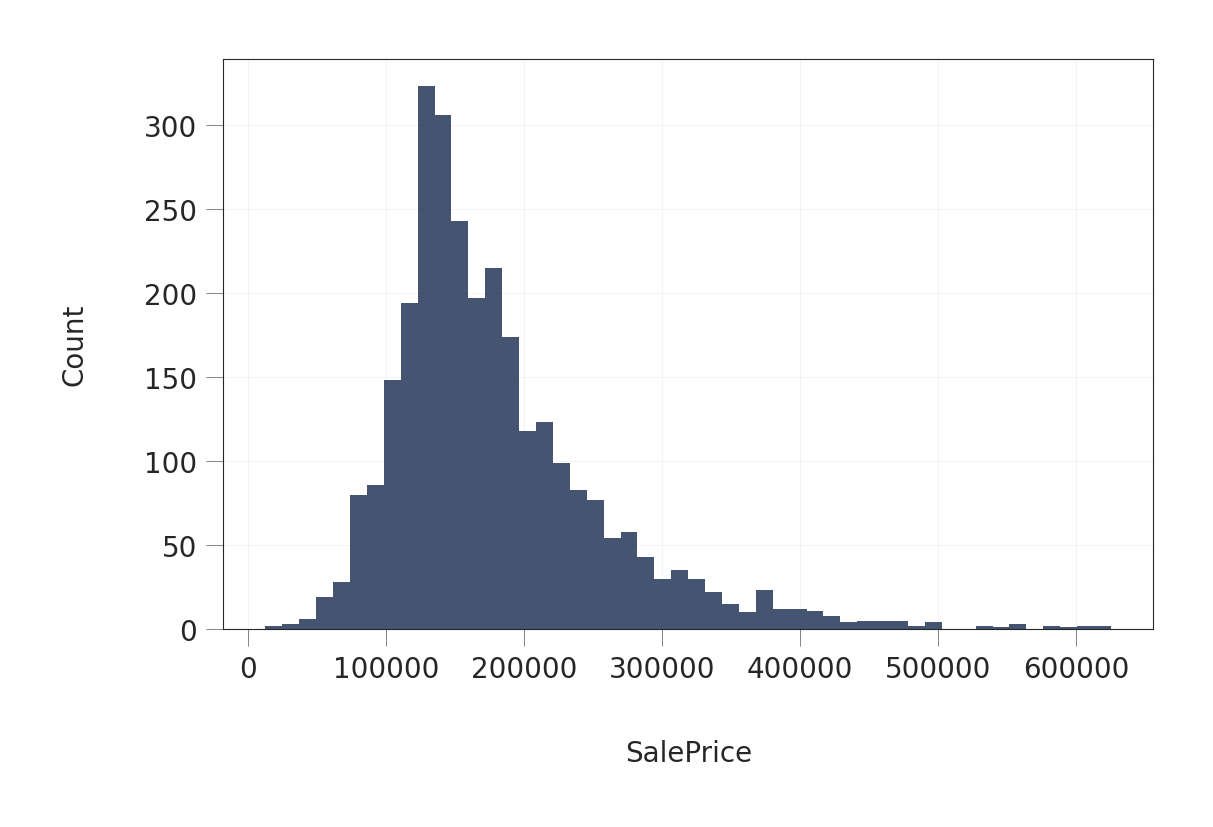

In [36]:
sns.distplot(dataset['SalePrice'], kde=False,
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

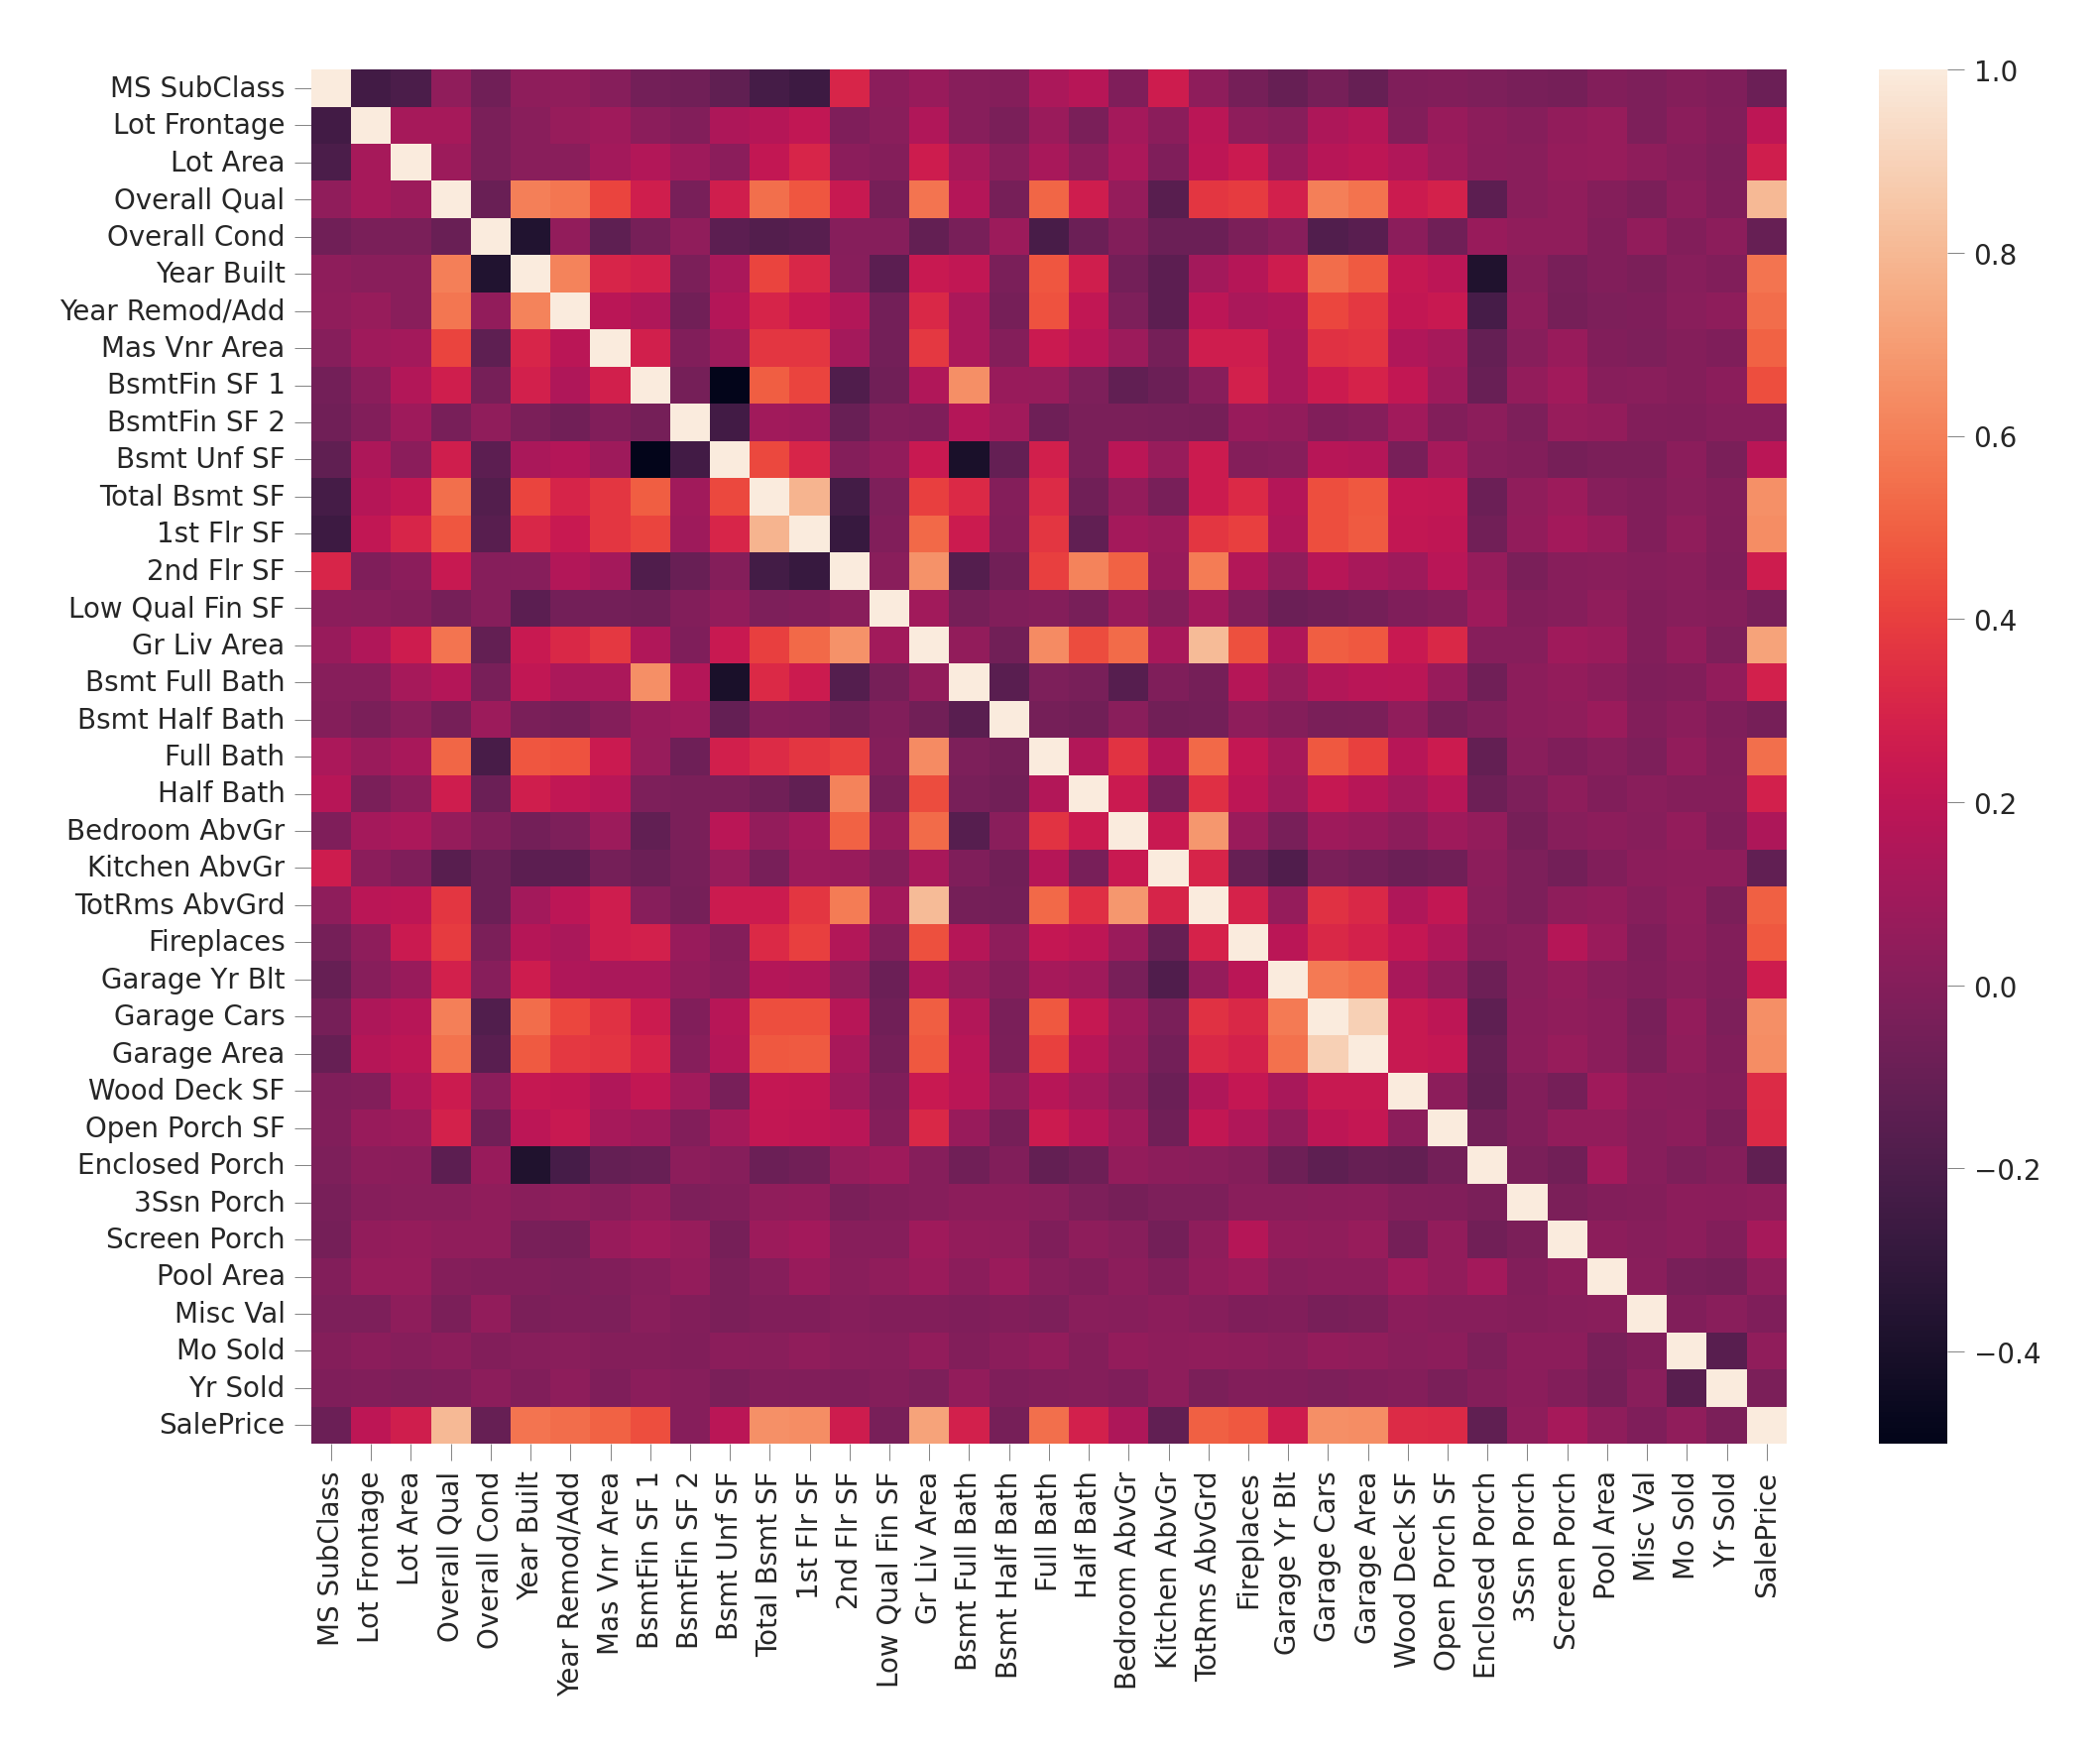

In [37]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(dataset.corr(), ax=ax);

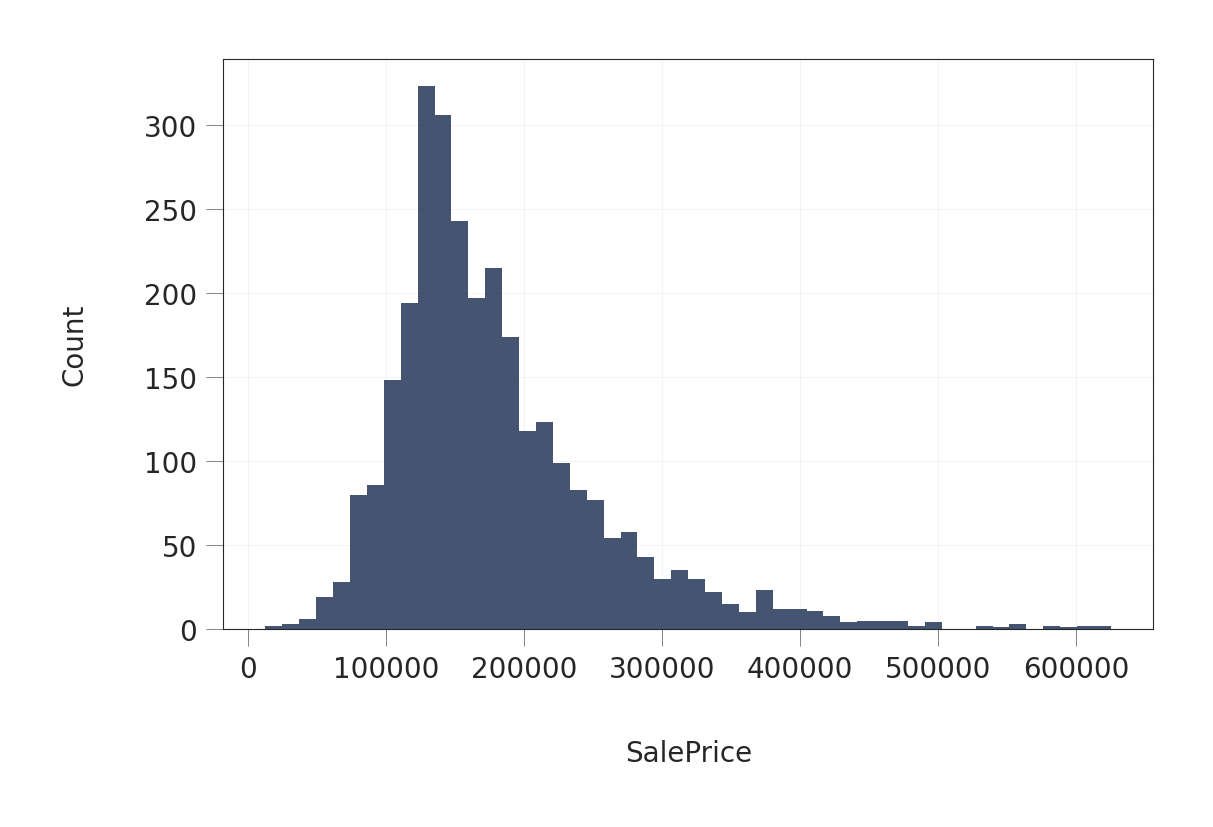

In [38]:
sns.distplot(dataset['SalePrice'], kde=False,
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

We can see that most house prices fall between 100,000 and 200,000. We see also that there is a number of expensive houses to the right of the plot. Now, we move to see the distribution of `Overall Qual` variable:

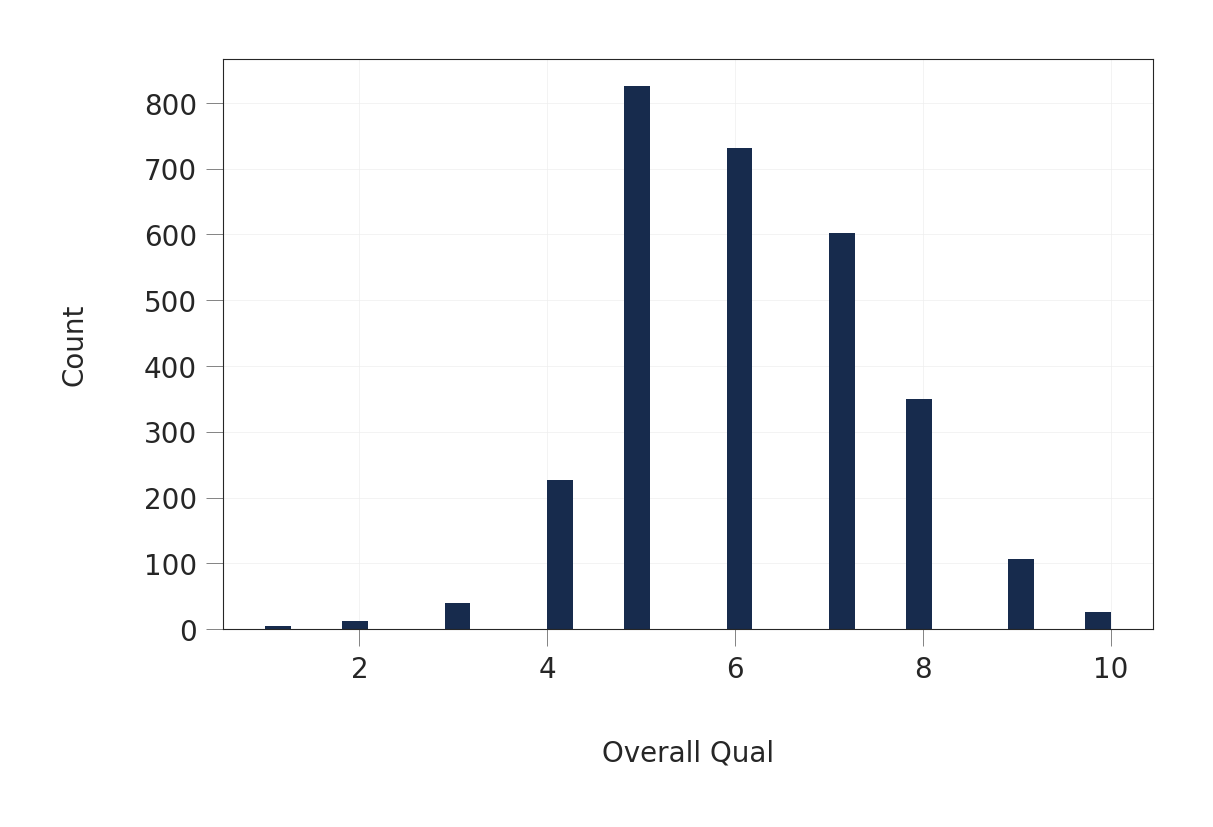

In [39]:
sns.distplot(dataset['Overall Qual'], kde=False,
             color="#172B4D", hist_kws={"alpha": 1});
plt.ylabel("Count");

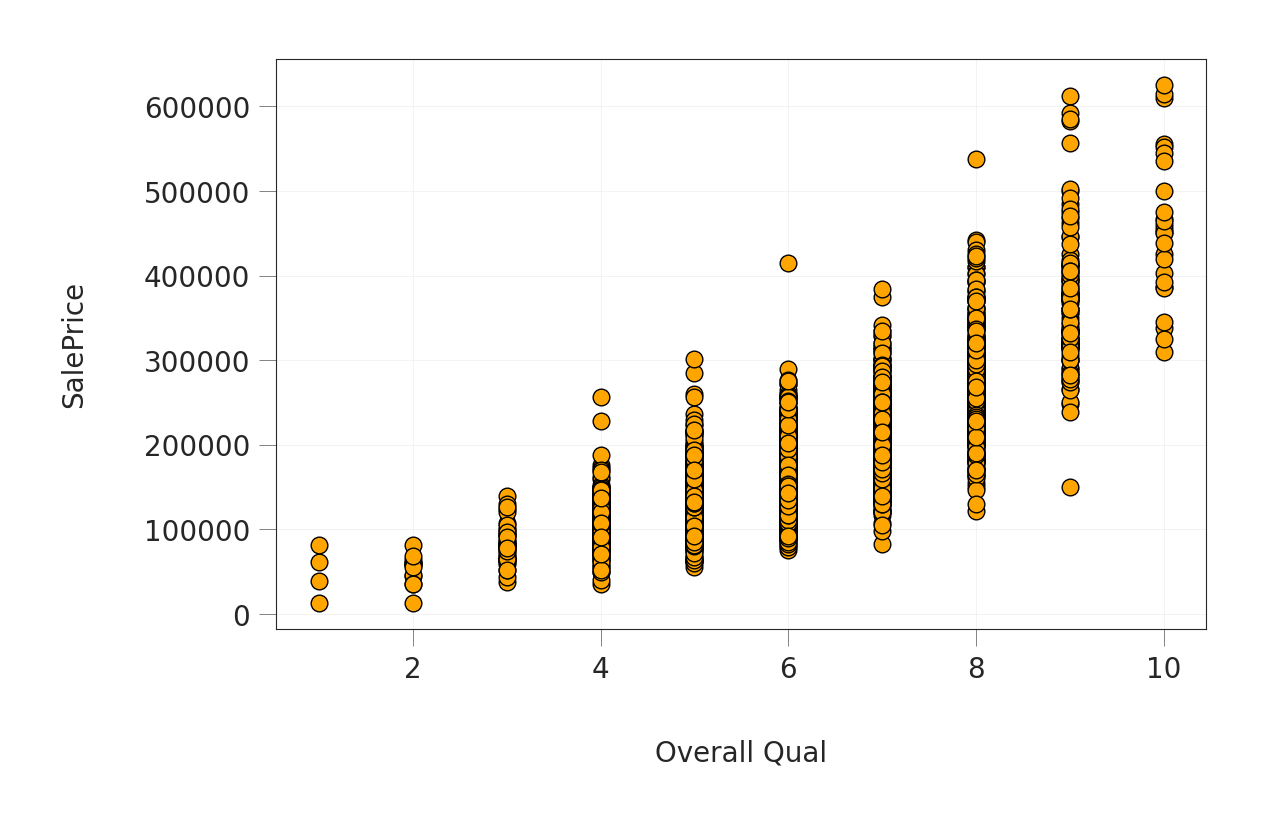

In [40]:
plt.scatter(x=dataset['Overall Qual'], y=dataset['SalePrice'],
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Overall Qual"); plt.ylabel("SalePrice");

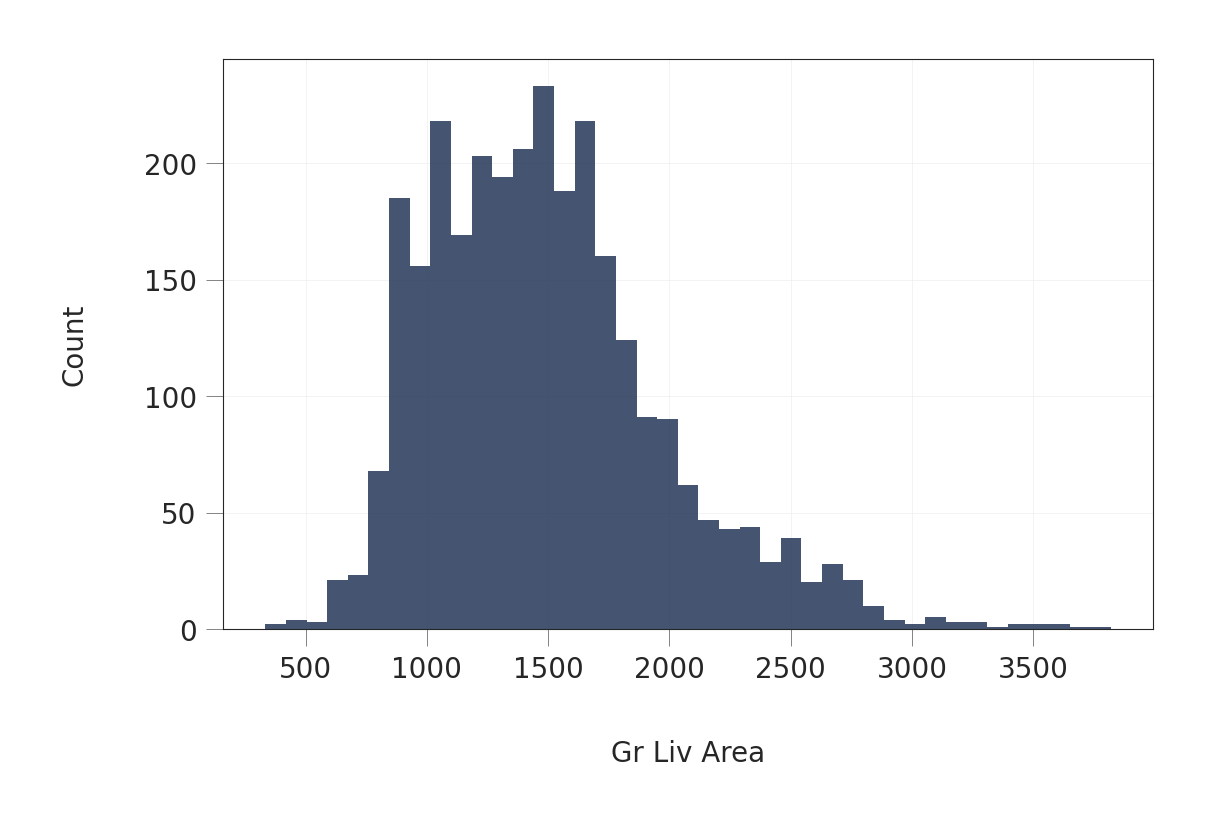

In [41]:
sns.distplot(dataset['Gr Liv Area'], kde=False,
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

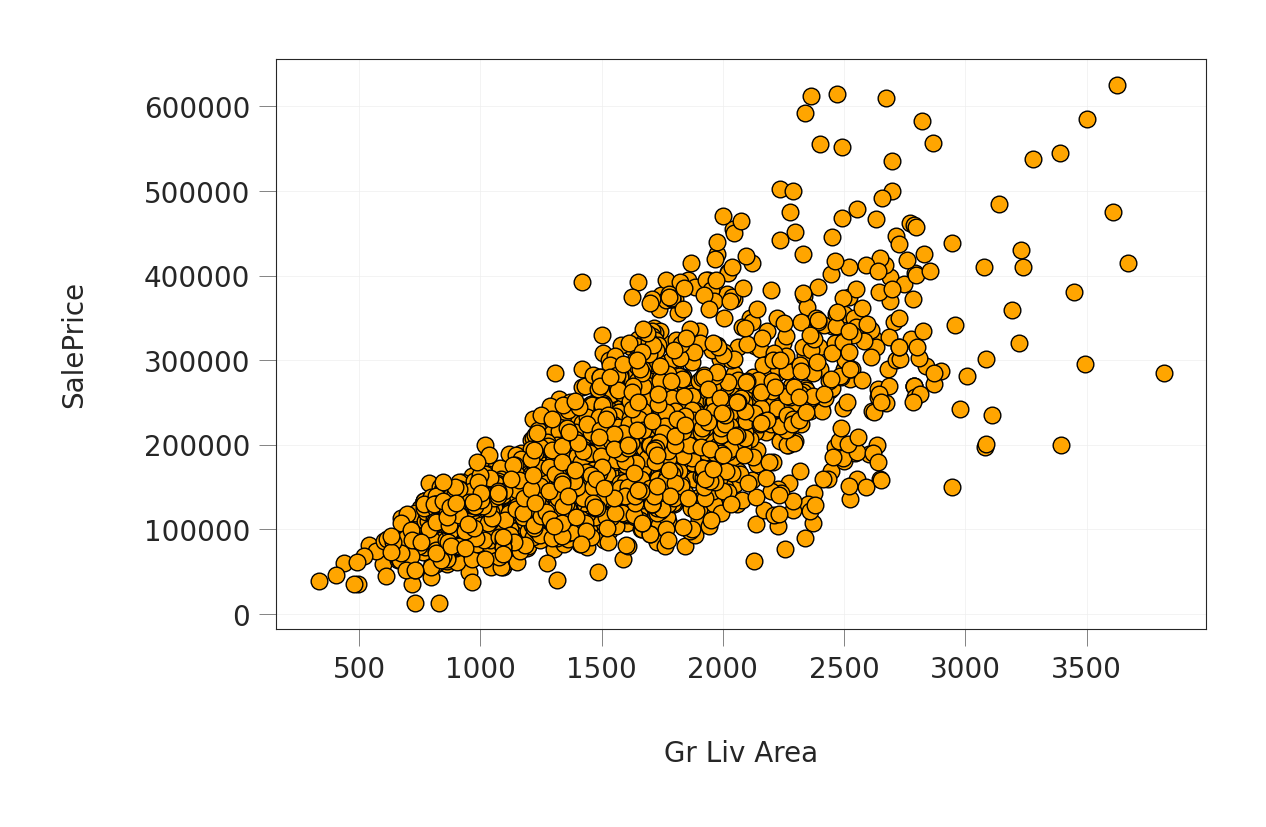

In [42]:
plt.scatter(x=dataset['Gr Liv Area'], y=dataset['SalePrice'],
            color="orange", edgecolors="#000000", linewidths=0.5);
plt.xlabel("Gr Liv Area"); plt.ylabel("SalePrice");

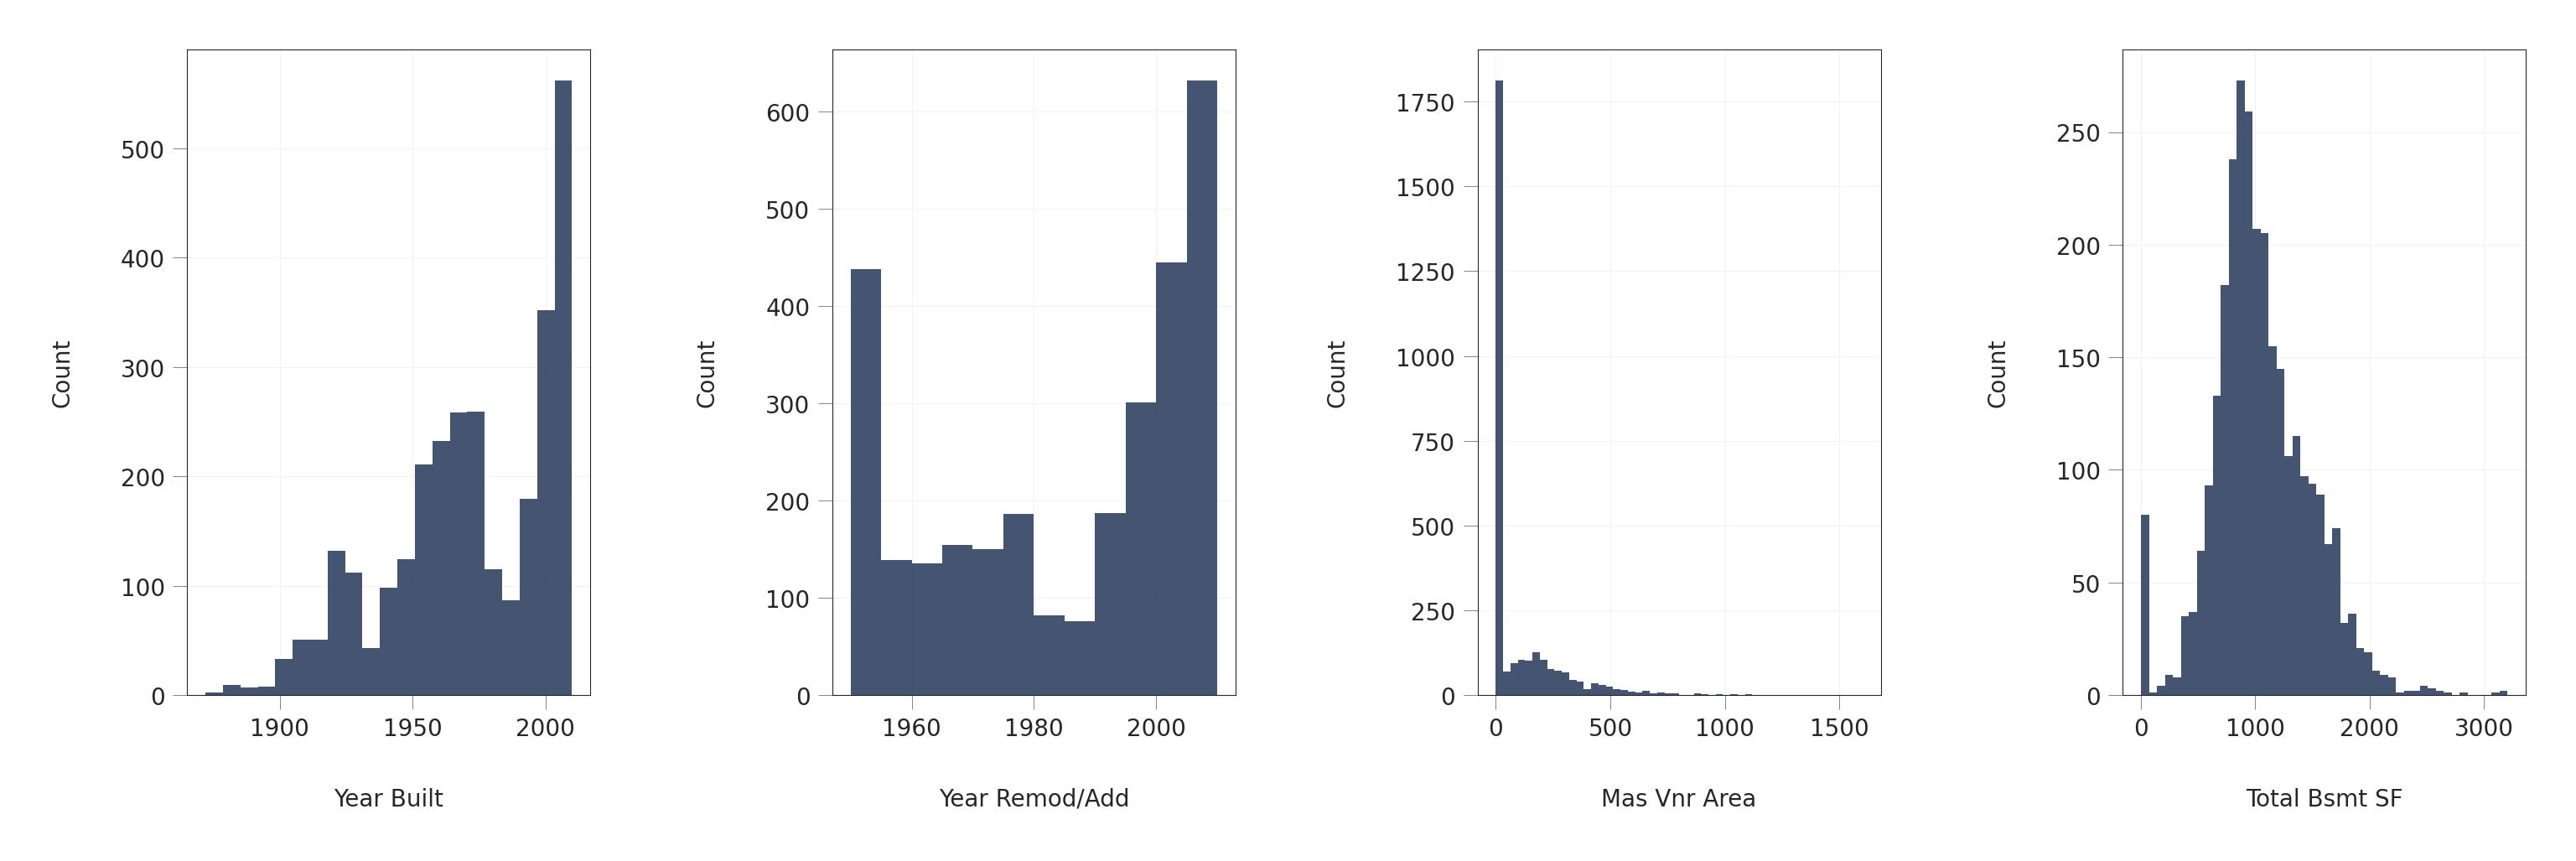

In [43]:
fig, axes = plt.subplots(1, 4, figsize=(18,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["Year Built", "Year Remod/Add",
                             "Mas Vnr Area", "Total Bsmt SF"]):
    sns.distplot(dataset[v], kde=False, color="#172B4D",
                 hist_kws={"alpha": 0.8}, ax=ax)
    ax.set(ylabel="Count");

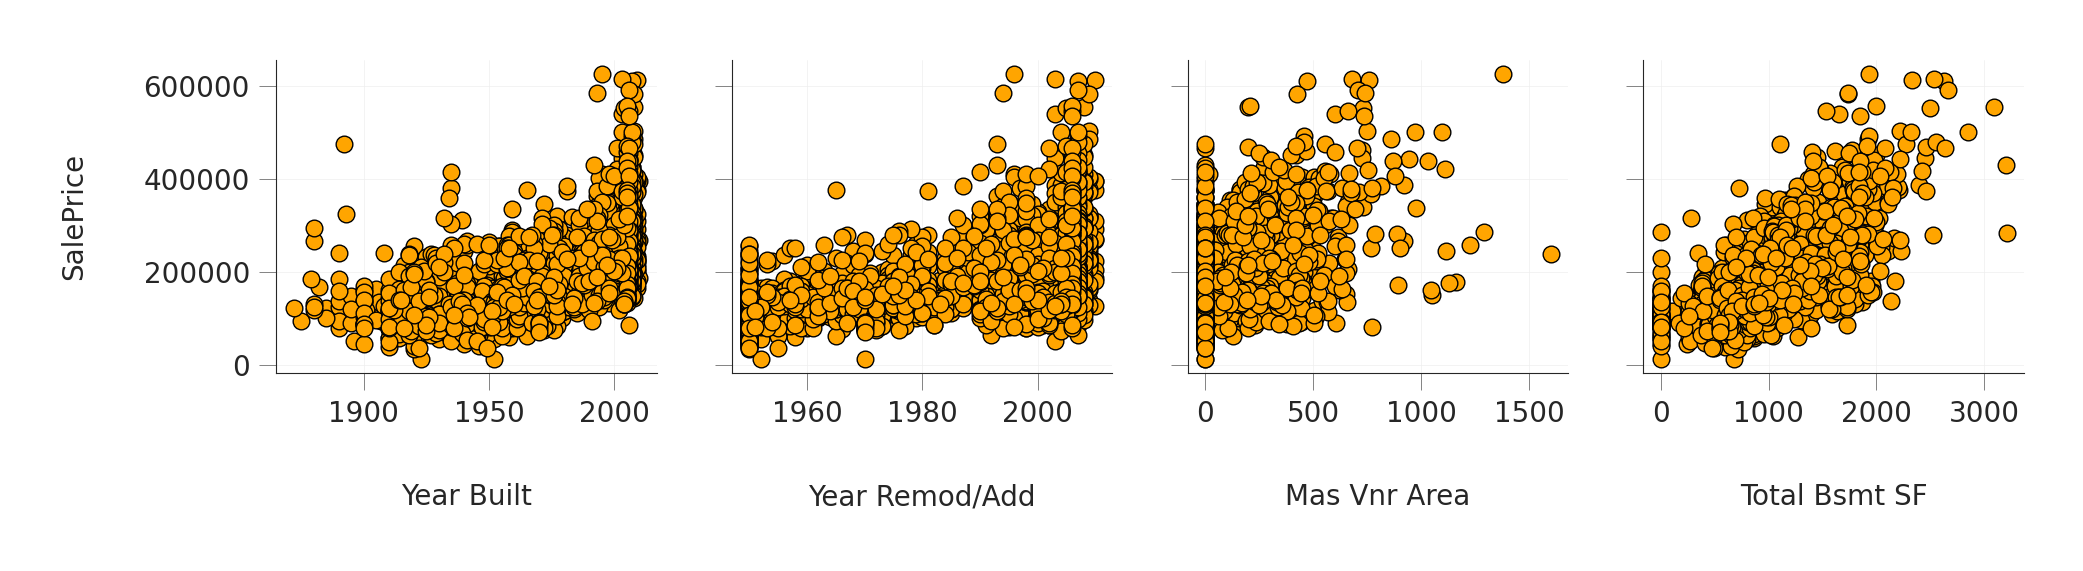

In [44]:
x_vars = ["Year Built", "Year Remod/Add", "Mas Vnr Area", "Total Bsmt SF"]
g = sns.PairGrid(dataset, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, color="orange", edgecolors="#000000", linewidths=0.5);

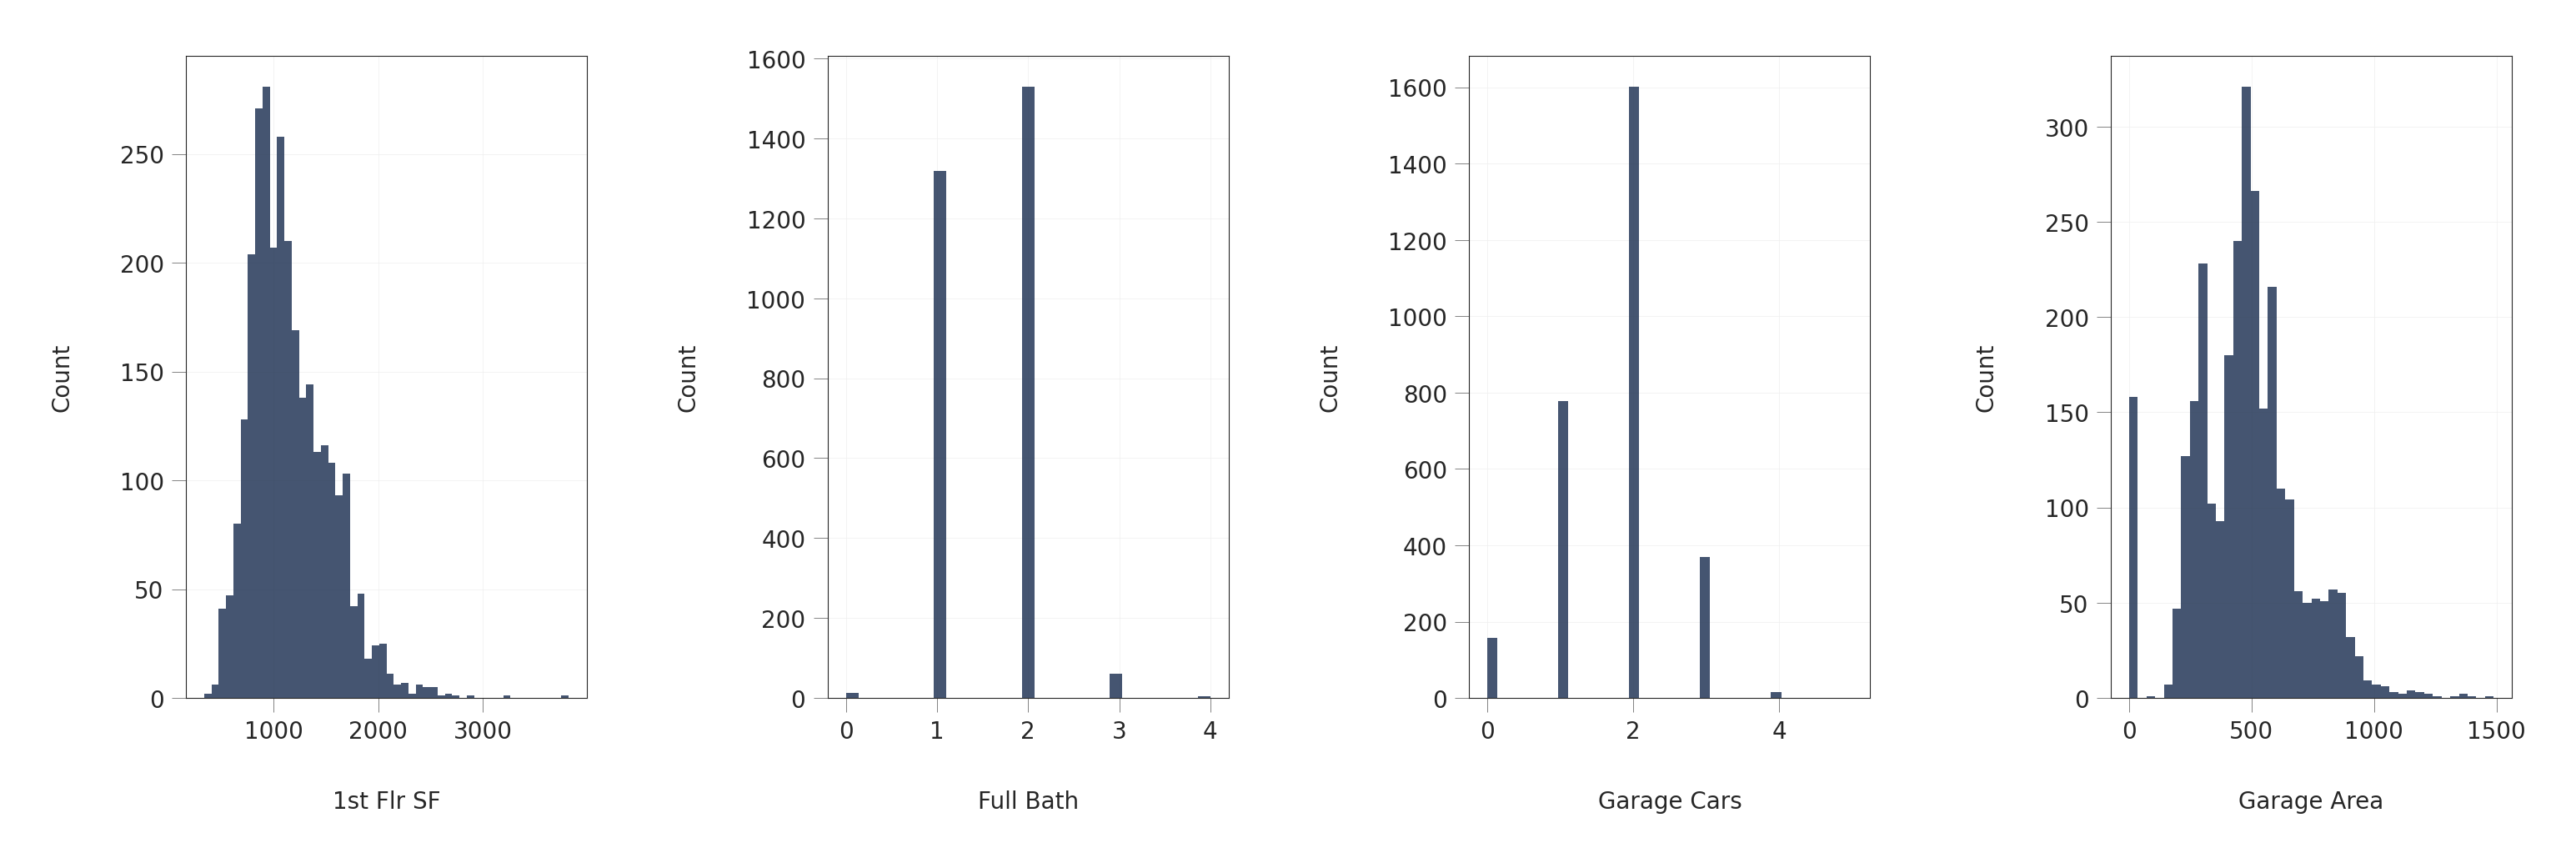

In [45]:
fig, axes = plt.subplots(1, 4, figsize=(18,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["1st Flr SF", "Full Bath",
                             "Garage Cars", "Garage Area"]):
    sns.distplot(dataset[v], kde=False, color="#172B4D",
                 hist_kws={"alpha": 0.8}, ax=ax);
    ax.set(ylabel="Count");

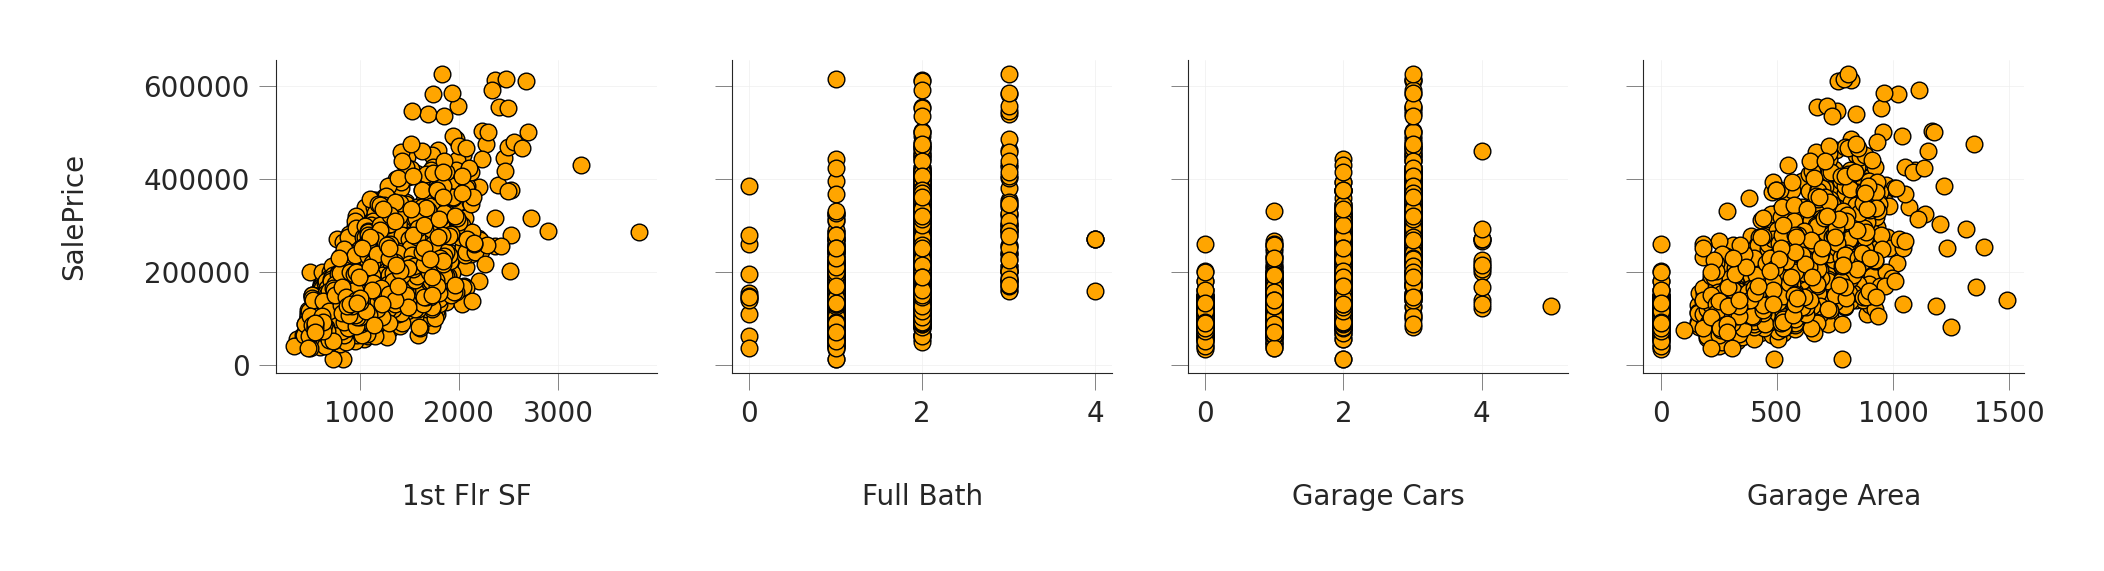

In [46]:
x_vars = ["1st Flr SF", "Full Bath", "Garage Cars", "Garage Area"]
g = sns.PairGrid(dataset, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, color="orange", edgecolors="#000000", linewidths=0.5);

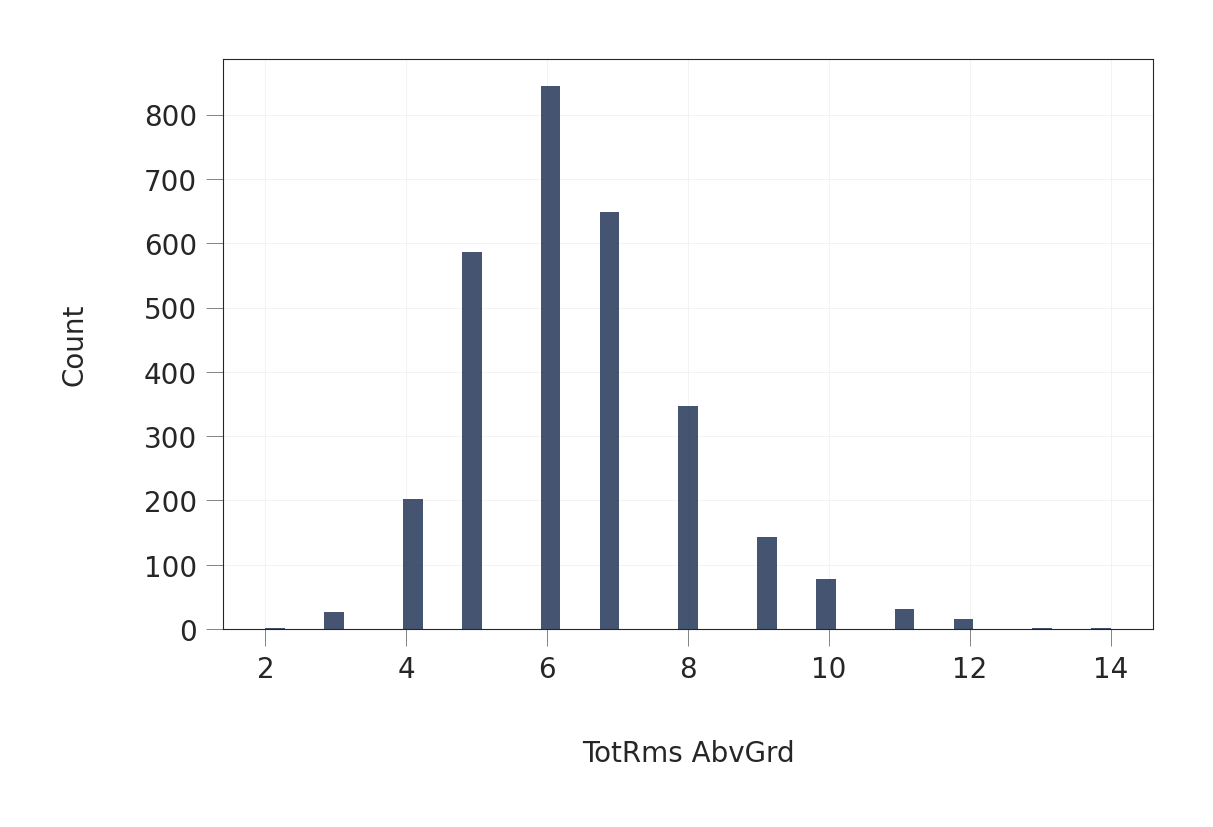

In [47]:
sns.distplot(dataset['TotRms AbvGrd'], kde=False,
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

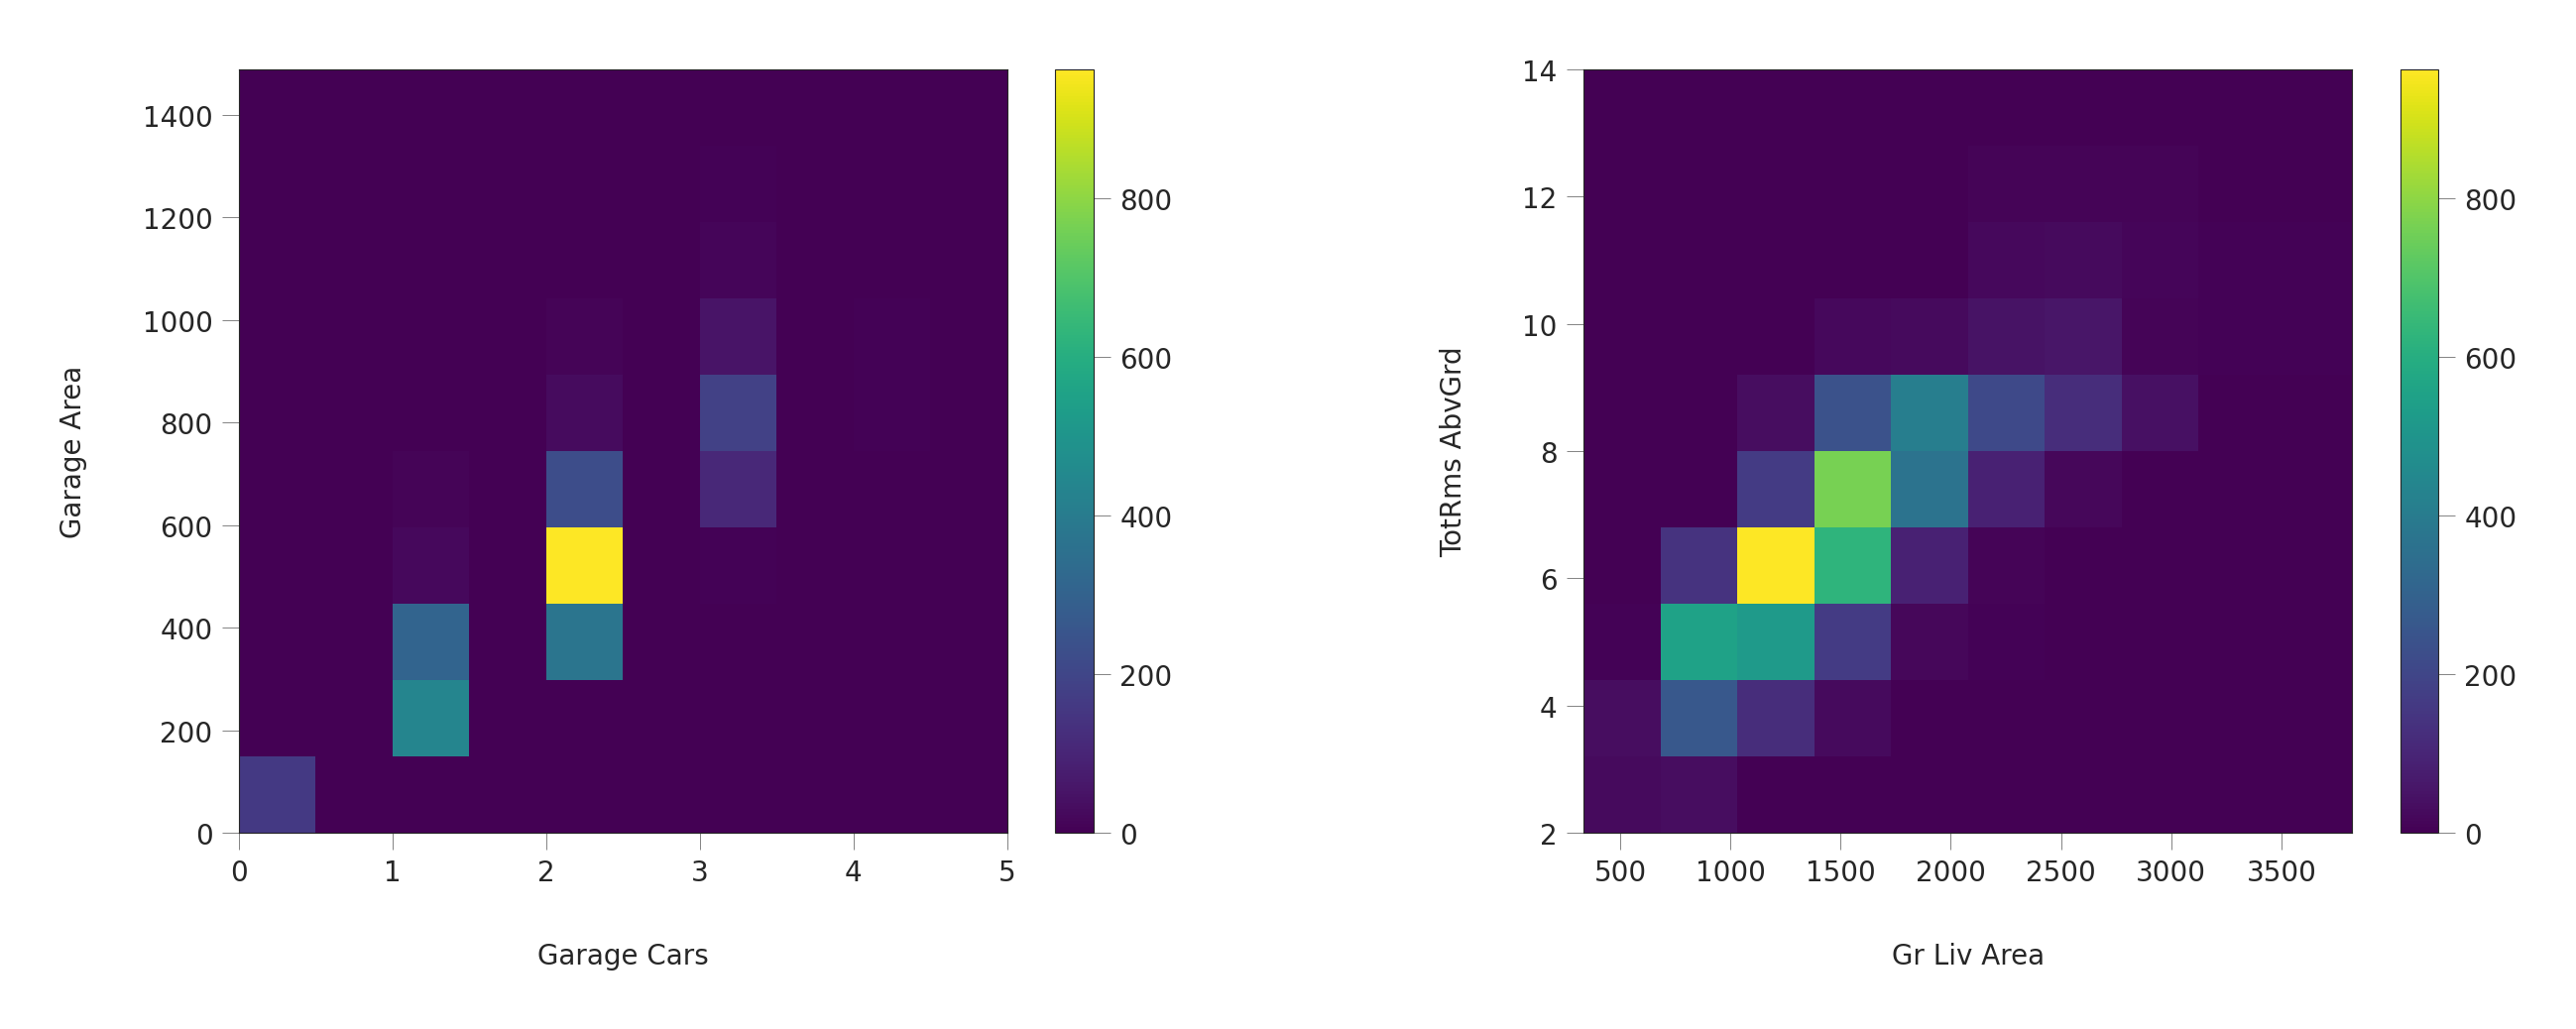

In [48]:
plt.rc("grid", linewidth=0.05)
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
h1 = axes[0].hist2d(dataset["Garage Cars"],
                    dataset["Garage Area"],
                    cmap="viridis");
axes[0].set(xlabel="Garage Cars", ylabel="Garage Area")
plt.colorbar(h1[3], ax=axes[0]);
h2 = axes[1].hist2d(dataset["Gr Liv Area"],
                    dataset["TotRms AbvGrd"],
                    cmap="viridis");
axes[1].set(xlabel="Gr Liv Area", ylabel="TotRms AbvGrd")
plt.colorbar(h1[3], ax=axes[1]);
plt.rc("grid", linewidth=0.25)

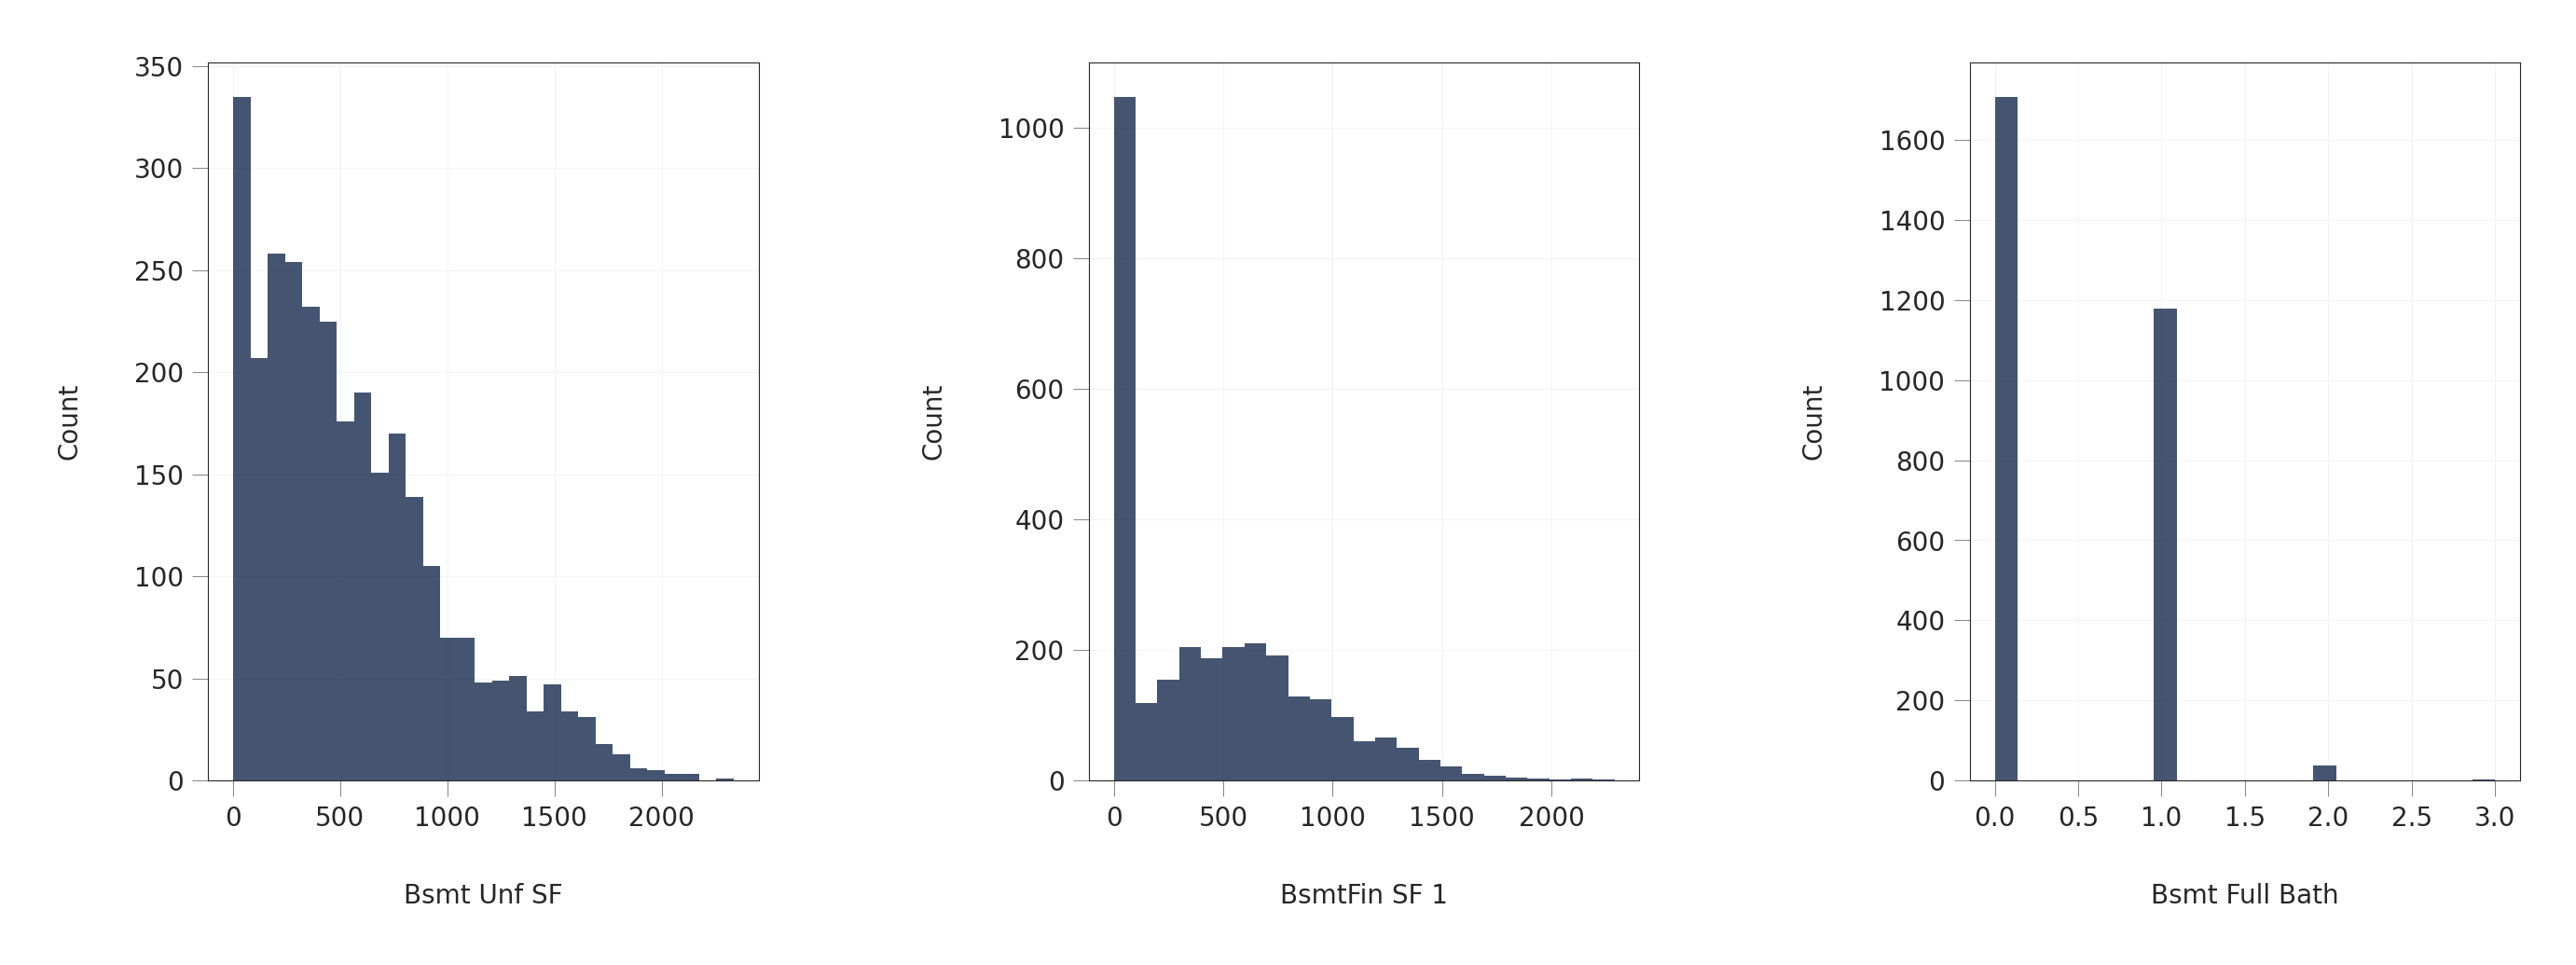

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["Bsmt Unf SF", "BsmtFin SF 1", "Bsmt Full Bath"]):
    sns.distplot(dataset[v], kde=False, color="#172B4D",
                 hist_kws={"alpha": 0.8}, ax=ax);
    ax.set(ylabel="Count")

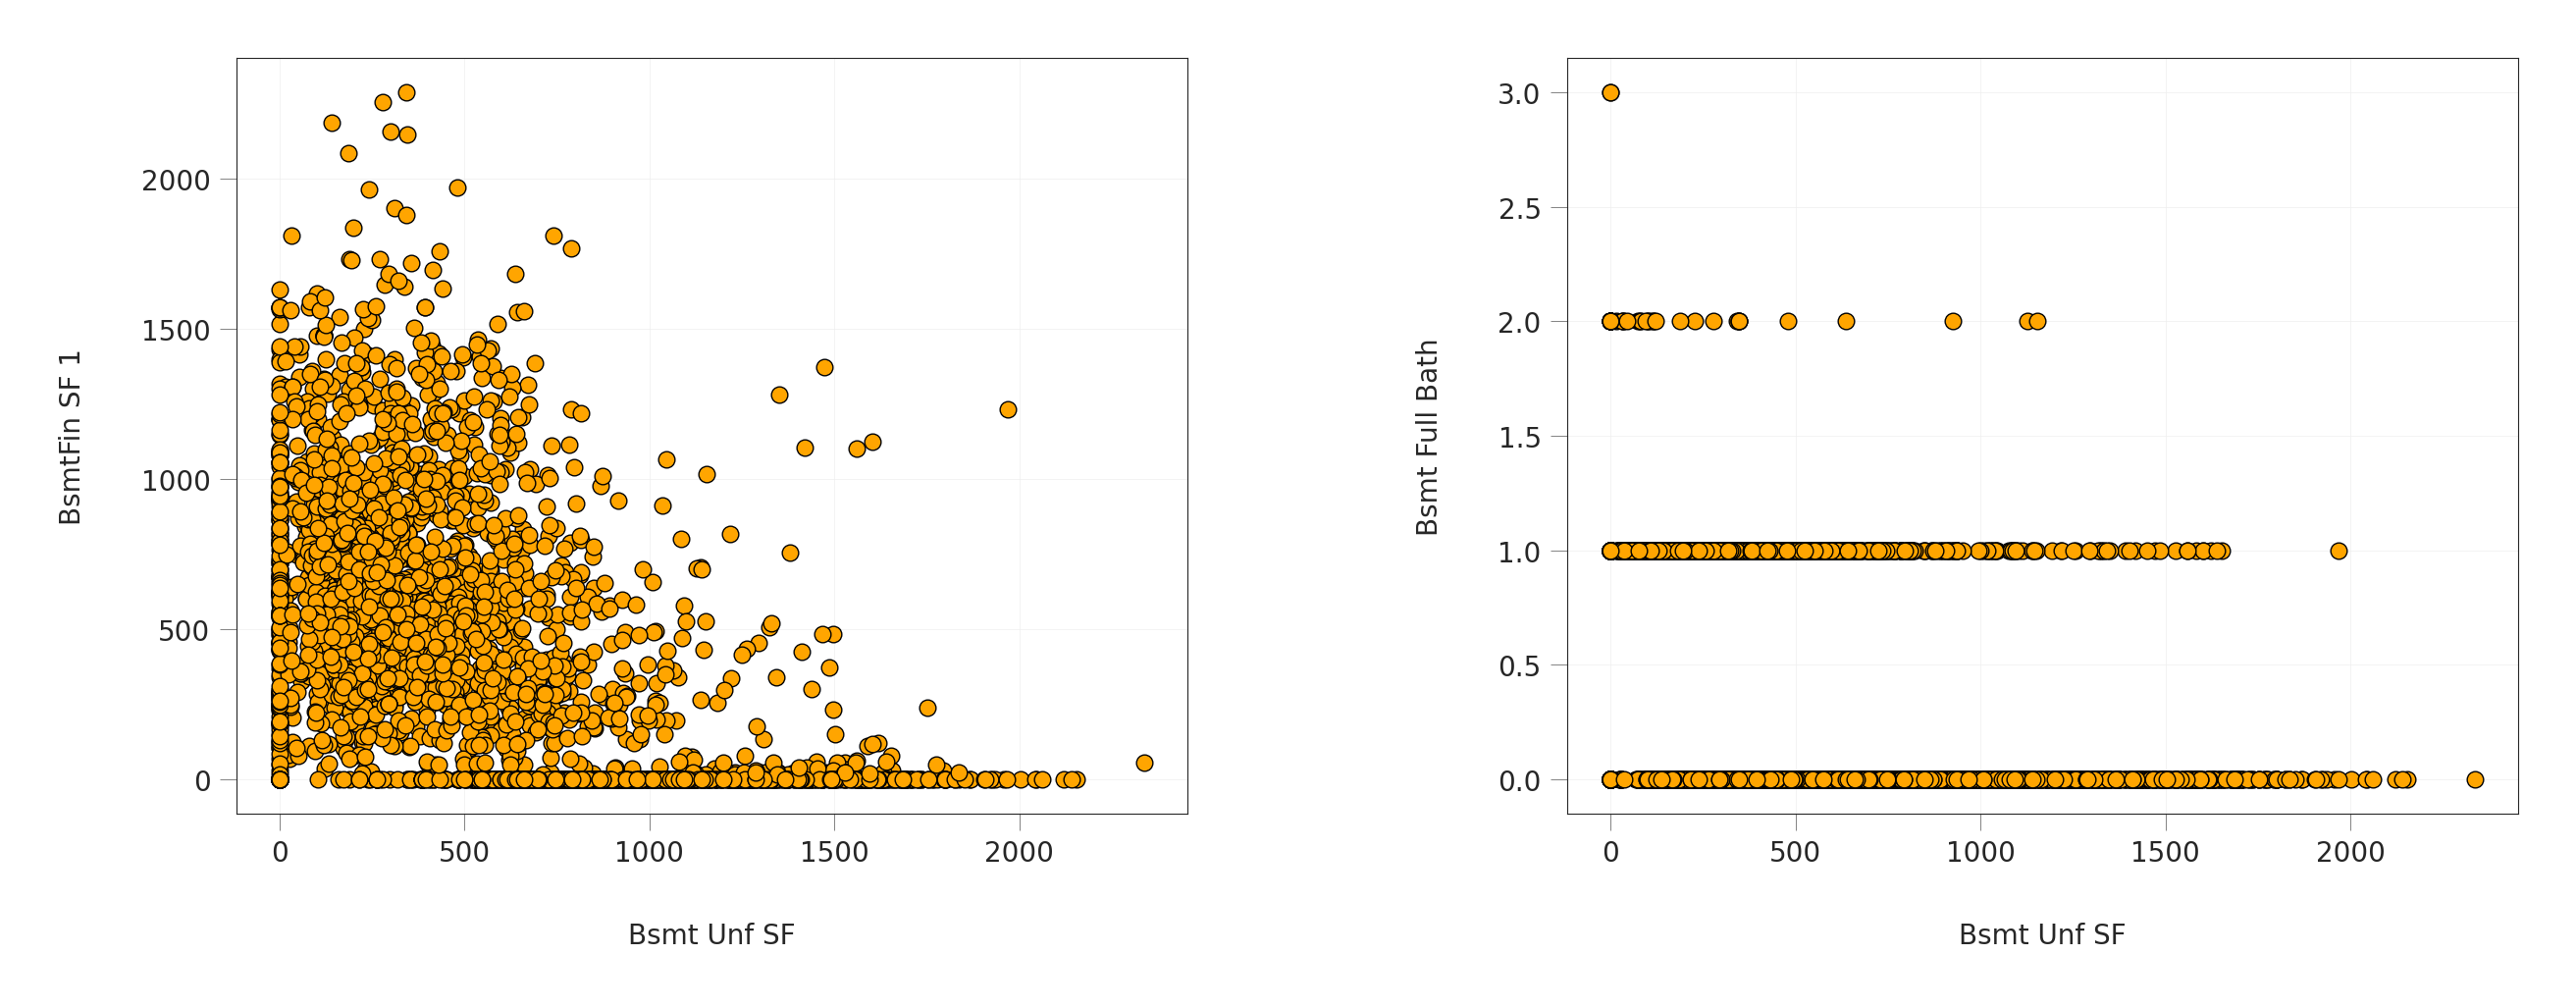

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
axes[0].scatter(dataset["Bsmt Unf SF"], dataset["BsmtFin SF 1"],
                color="orange", edgecolors="#000000", linewidths=0.5);
axes[0].set(xlabel="Bsmt Unf SF", ylabel="BsmtFin SF 1");
axes[1].scatter(dataset["Bsmt Unf SF"], dataset["Bsmt Full Bath"],
                color="orange", edgecolors="#000000", linewidths=0.5);
axes[1].set(xlabel="Bsmt Unf SF", ylabel="Bsmt Full Bath");

In [51]:
for f in ["Overall Qual", "Gr Liv Area"]:
    dataset[f + "_p2"] = dataset[f] ** 2
    dataset[f + "_p3"] = dataset[f] ** 3
dataset["OverallQual_GrLivArea"] = \
    dataset["Overall Qual"] * dataset["Gr Liv Area"]

In [52]:
dataset.drop(["Garage Cars", "TotRms AbvGrd"], axis=1, inplace=True)

In [53]:
print("Unique values in 'Bsmt Cond' column:")
print(dataset['Bsmt Cond'].unique().tolist())

Unique values in 'Bsmt Cond' column:
['Gd', 'TA', 'No Basement', 'Po', 'Fa', 'Ex']


In [54]:
mp = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
dataset['Exter Qual'] = dataset['Exter Qual'].map(mp)
dataset['Exter Cond'] = dataset['Exter Cond'].map(mp)
dataset['Heating QC'] = dataset['Heating QC'].map(mp)
dataset['Kitchen Qual'] = dataset['Kitchen Qual'].map(mp)

mp = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0}
dataset['Bsmt Qual'] = dataset['Bsmt Qual'].map(mp)
dataset['Bsmt Cond'] = dataset['Bsmt Cond'].map(mp)
dataset['Bsmt Exposure'] = dataset['Bsmt Exposure'].map(
    {'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})

mp = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0}
dataset['BsmtFin Type 1'] = dataset['BsmtFin Type 1'].map(mp)
dataset['BsmtFin Type 2'] = dataset['BsmtFin Type 2'].map(mp)

dataset['Central Air'] = dataset['Central Air'].map({'Y':1,'N':0})
dataset['Functional'] = dataset['Functional'].map(
    {'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,
     'Maj2':2,'Sev':1,'Sal':0})
dataset['Fireplace Qu'] = dataset['Fireplace Qu'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})
dataset['Garage Finish'] = dataset['Garage Finish'].map(
    {'Fin':3,'RFn':2,'Unf':1,'No Garage':0})
dataset['Garage Qual'] = dataset['Garage Qual'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
dataset['Garage Cond'] = dataset['Garage Cond'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
dataset['Pool QC'] = dataset['Pool QC'].map(
    {'Ex':4,'Gd':3,'TA':2,'Fa':1,'No Pool':0})
dataset['Land Slope'] = dataset['Land Slope'].map(
    {'Sev': 2, 'Mod': 1, 'Gtl': 0})
dataset['Fence'] = dataset['Fence'].map(
    {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'No Fence':0})

In [55]:
dataset[['Paved Drive']].head()

,Paved Drive
0,P
1,Y
2,Y
3,Y
4,Y


In [56]:
dataset = pd.get_dummies(dataset)

In [57]:
pavedDrive_oneHot = [c for c in dataset.columns if c.startswith("Paved")]
dataset[pavedDrive_oneHot].head()

,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [58]:
dataset[['SalePrice']].head()

,SalePrice
0,215000
1,105000
2,172000
3,244000
4,189900


In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# We need to fit the scaler to our data before transformation
dataset.loc[:, dataset.columns != 'SalePrice'] = scaler.fit_transform(
    dataset.loc[:, dataset.columns != 'SalePrice'])

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop('SalePrice', axis=1), dataset[['SalePrice']],
    test_size=0.25, random_state=3)

In [70]:
from sklearn.linear_model import ElasticNet

parameter_space = {
    "alpha": [1, 10, 100, 280, 500],
    "l1_ratio": [0.5, 1],
    "fit_intercept": [True, False],
}

clf = GridSearchCV(ElasticNet(random_state=3), parameter_space,
                   n_jobs=4, cv=3, scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'alpha': 280, 'fit_intercept': True, 'l1_ratio': 1}


In [71]:
elasticNet_model = ElasticNet(random_state=3, **clf.best_params_)

In [72]:
elasticNet_model.fit(X_train, y_train);

In [73]:
y_pred = elasticNet_model.predict(X_test)
elasticNet_mae = mean_absolute_error(y_test, y_pred)
print("Elastic Net MAE =", elasticNet_mae)

Elastic Net MAE = 14767.90981933659


In [84]:
dt_model = DecisionTreeRegressor(**clf.best_params_)

In [85]:
dt_model.fit(X_train, y_train);

In [86]:
y_pred = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, y_pred)
print("Decision Tree MAE =", dt_mae)

Decision Tree MAE = 20873.949425979506


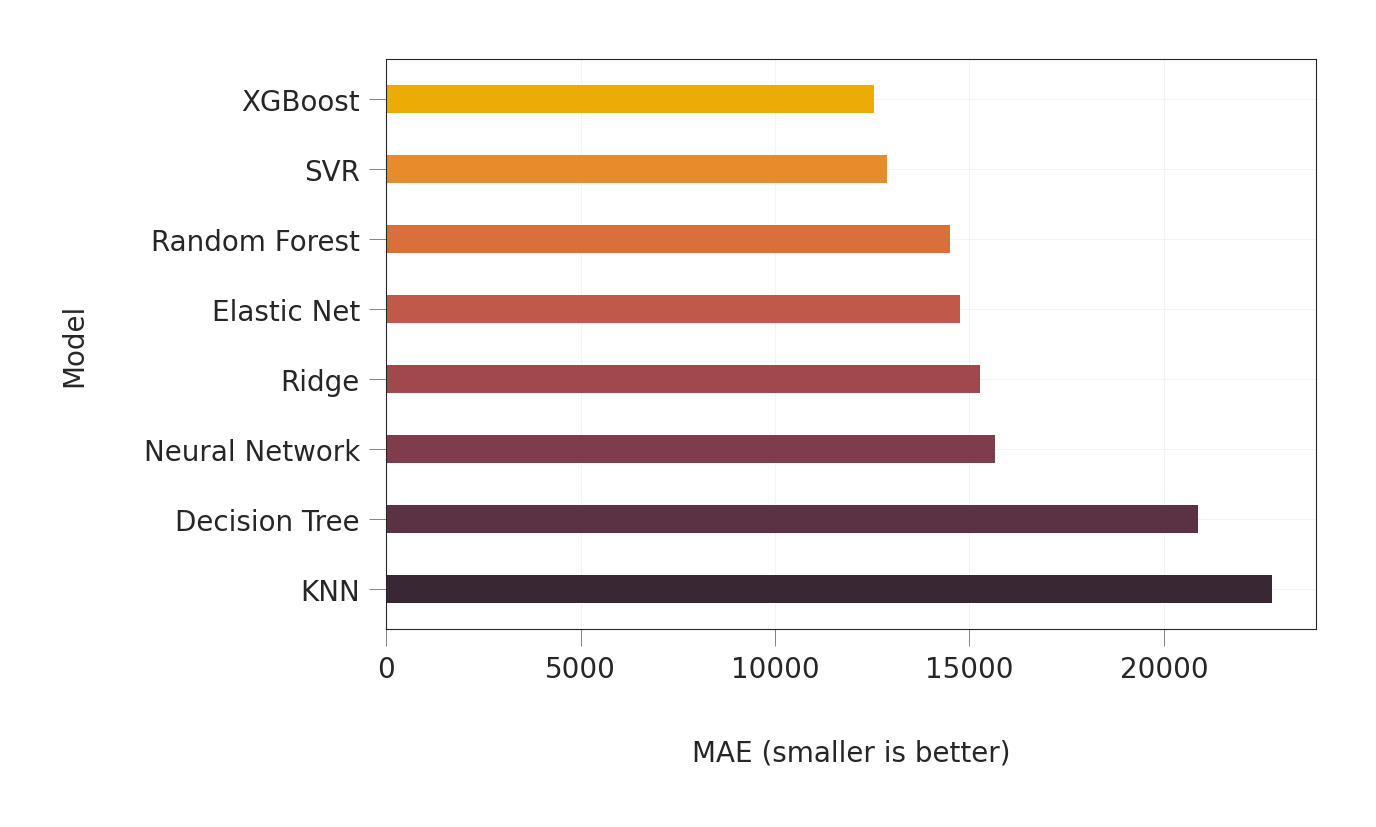

In [98]:
x = ['KNN', 'Decision Tree', 'Neural Network', 'Ridge',
     'Elastic Net', 'Random Forest', 'SVR', 'XGBoost']
y = [22780.14, 20873.95, 15656.38, 15270.46, 14767.91,
     14506.46, 12874.93, 12556.68]
colors = ["#392834", "#5a3244", "#7e3c4d", "#a1484f",
          "#c05949", "#d86f3d", "#e88b2b", "#edab06"]
fig, ax = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
ax.set(xlabel="MAE (smaller is better)", ylabel="Model");

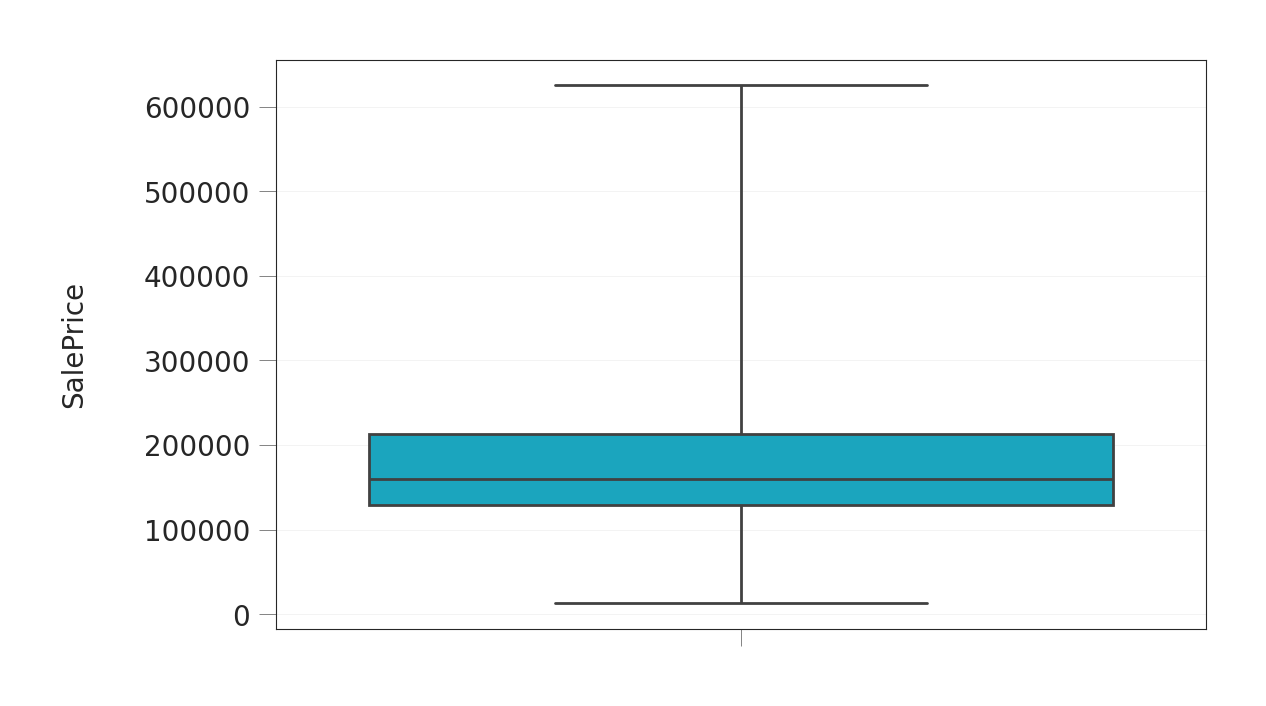

In [100]:
sns.boxplot(dataset['SalePrice'], whis=10, color="#00B8D9");

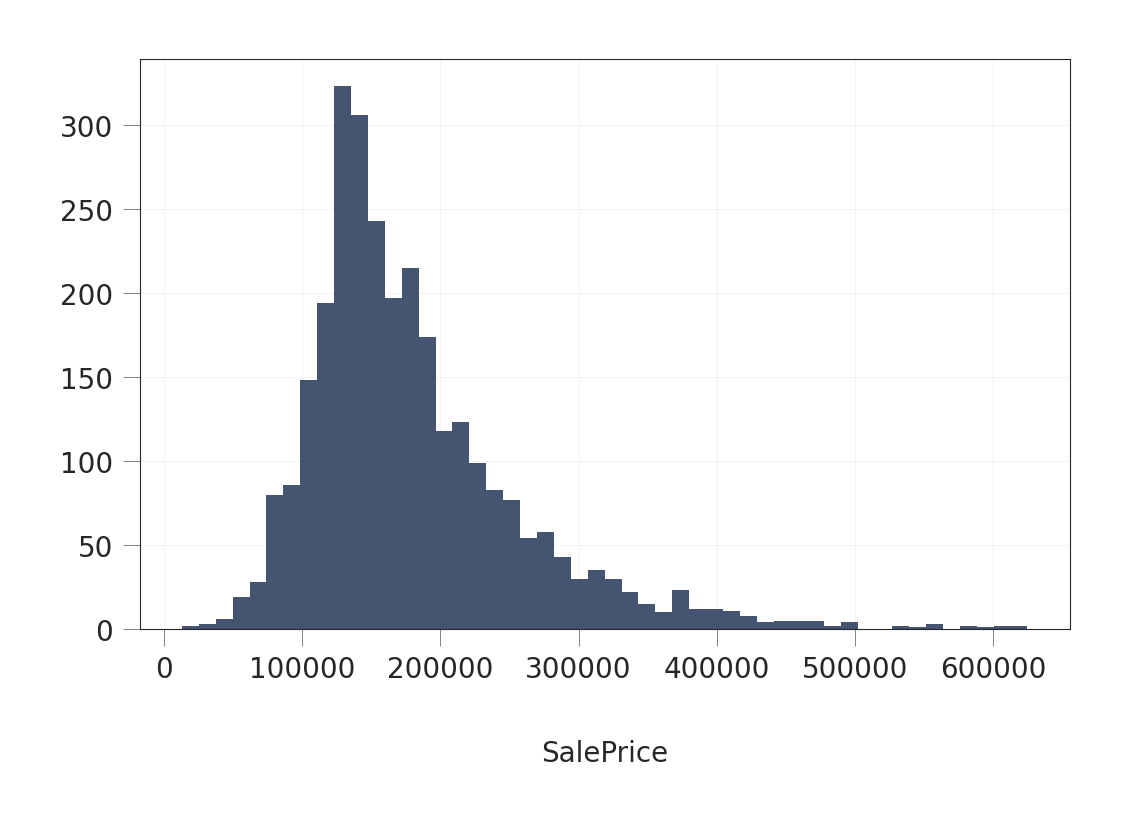

In [101]:
sns.distplot(dataset['SalePrice'], kde=False,
             color="#172B4D", hist_kws={"alpha": 0.8});

In [102]:
y_train.describe(include=[np.number])

,SalePrice
count,2193.00
mean,179846.69
std,79729.38
min,12789.00
25%,128500.00
50%,159895.00
75%,214000.00
max,625000.00
